In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Free Lunch Qualification

#### Data Cleaning
Get public high schools

In [3]:
frmp_1819 = pd.read_csv('/content/drive/MyDrive/MDS/Data 294P/Data and Code/frpm1819.csv', dtype={'County Code': str,'District Code': str, 'School Code': str})
frmp_1819.head()
frmp_1819['CDS_CODE'] = frmp_1819['County Code'] + frmp_1819['District Code'] + frmp_1819['School Code']
frmp_1819.head()

Academic Year County Code District Code School Code County Name  \
0     2018-2019          01         10017     0112607     Alameda   
1     2018-2019          01         10017     0123968     Alameda   
2     2018-2019          01         10017     0124172     Alameda   
3     2018-2019          01         10017     0125567     Alameda   
4     2018-2019          01         10017     0130401     Alameda   

                        District Name  \
0  Alameda County Office of Education   
1  Alameda County Office of Education   
2  Alameda County Office of Education   
3  Alameda County Office of Education   
4  Alameda County Office of Education   

                               School Name                     District Type  \
0   Envision Academy for Arts & Technology  County Office of Education (COE)   
1  Community School for Creative Education  County Office of Education (COE)   
2                          Yu Ming Charter  County Office of Education (COE)   
3                 Urban Montessori Charter  County Office of Education (COE)   
4       Alameda County Juvenile Hall/Court  County Office of Education (COE)   

                   School Type Educational Option Type  ...  \
0        High Schools (Public)             Traditional  ...   
1  Elementary Schools (Public)             Traditional  ...   
2  Elementary Schools (Public)             Traditional  ...   
3  Elementary Schools (Public)             Traditional  ...   
4       Juvenile Court Schools   Juvenile Court School  ...   

  Percent (%) Eligible Free (K-12) FRPM Count (K-12)  \
0                            68.1%               306   
1                            49.0%               120   
2                            13.0%                64   
3                            26.2%               131   
4                           100.0%                53   

  Percent (%) Eligible FRPM (K-12) Enrollment (Ages 5-17)  \
0                            79.5%                    370   
1                            49.8%                    224   
2                            14.4%                    445   
3                            30.3%                    418   
4                           100.0%                     50   

  Free Meal Count (Ages 5-17) Percent (%) Eligible Free (Ages 5-17)  \
0                         249                                 67.3%   
1                         113                                 50.4%   
2                          58                                 13.0%   
3                         111                                 26.6%   
4                          50                                100.0%   

  FRPM Count (Ages 5-17) Percent (%) Eligible FRPM (Ages 5-17)  \
0                    291                                 78.6%   
1                    115                                 51.3%   
2                     64                                 14.4%   
3                    129                                 30.9%   
4                     50                                100.0%   

  CALPADS Fall 1 Certification Status        CDS_CODE  
0                                   Y  01100170112607  
1                                   Y  01100170123968  
2                                   Y  01100170124172  
3                                   Y  01100170125567  
4                                   Y  01100170130401  

[5 rows x 29 columns]

In [4]:
frmp_1819['DistrictCode'] = frmp_1819['County Code'] + frmp_1819['District Code']

In [5]:
frmp_1819_public_hs = frmp_1819[frmp_1819['School Type'] == 'High Schools (Public)']

In [6]:
public_hs = frmp_1819_public_hs['CDS_CODE'].unique()

In [7]:
len(public_hs)

1315

In [8]:
frmp_1819_public_hs.columns

Index(['Academic Year', 'County Code', 'District Code', 'School Code',
       'County Name', 'District Name', 'School Name', 'District Type',
       'School Type', 'Educational Option Type', 'NSLP Provision Status',
       'Charter School (Y/N)', 'Charter School Number', 'Charter Funding Type',
       'IRC', 'Low Grade', 'High Grade', 'Enrollment (K-12)',
       'Free Meal Count (K-12)', 'Percent (%) Eligible Free (K-12)',
       'FRPM Count (K-12)', 'Percent (%) Eligible FRPM (K-12)',
       'Enrollment (Ages 5-17)', 'Free Meal Count (Ages 5-17)',
       'Percent (%) Eligible Free (Ages 5-17)', 'FRPM Count (Ages 5-17)',
       'Percent (%) Eligible FRPM (Ages 5-17)',
       'CALPADS Fall 1 Certification Status', 'CDS_CODE', 'DistrictCode'],
      dtype='object')

In [9]:
frmp_1819_public_hs = frmp_1819_public_hs[['CDS_CODE', 'DistrictCode','District Name', 'School Name', 'Percent (%) Eligible Free (K-12)', 'Percent (%) Eligible FRPM (K-12)']]
print(frmp_1819_public_hs.shape)
frmp_1819_public_hs.head()

(1315, 6)


CDS_CODE DistrictCode                       District Name  \
0   01100170112607      0110017  Alameda County Office of Education   
20  01611190130229      0161119                     Alameda Unified   
22  01611190130625      0161119                     Alameda Unified   
38  01611270130450      0161127                 Albany City Unified   
44  01611430131177      0161143                    Berkeley Unified   

                               School Name Percent (%) Eligible Free (K-12)  \
0   Envision Academy for Arts & Technology                            68.1%   
20                            Alameda High                            19.6%   
22                  Alternatives in Action                            90.1%   
38                             Albany High                            16.3%   
44                           Berkeley High                            23.4%   

   Percent (%) Eligible FRPM (K-12)  
0                             79.5%  
20                            21.0%  
22                            94.6%  
38                            18.3%  
44                            26.1%

In [10]:
frmp_1819_public_hs.dtypes

CDS_CODE                            object
DistrictCode                        object
District Name                       object
School Name                         object
Percent (%) Eligible Free (K-12)    object
Percent (%) Eligible FRPM (K-12)    object
dtype: object

In [11]:
# change percentages to numeric
frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'] = frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'].str.replace('%', '')
frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'] = frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'].str.replace('%', '')
frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'] = pd.to_numeric(frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'])
frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'] = pd.to_numeric(frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'])

<ipython-input-11-c85ca60d7f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'] = frmp_1819_public_hs['Percent (%) Eligible Free (K-12)'].str.replace('%', '')
<ipython-input-11-c85ca60d7f93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'] = frmp_1819_public_hs['Percent (%) Eligible FRPM (K-12)'].str.replace('%', '')
<ipython-input-11-c85ca60d7f93>:4: SettingWithCopyWarning: 
A value is trying to

In [12]:
frmp_1819_public_hs.head()

CDS_CODE DistrictCode                       District Name  \
0   01100170112607      0110017  Alameda County Office of Education   
20  01611190130229      0161119                     Alameda Unified   
22  01611190130625      0161119                     Alameda Unified   
38  01611270130450      0161127                 Albany City Unified   
44  01611430131177      0161143                    Berkeley Unified   

                               School Name  Percent (%) Eligible Free (K-12)  \
0   Envision Academy for Arts & Technology                              68.1   
20                            Alameda High                              19.6   
22                  Alternatives in Action                              90.1   
38                             Albany High                              16.3   
44                           Berkeley High                              23.4   

    Percent (%) Eligible FRPM (K-12)  
0                               79.5  
20                              21.0  
22                              94.6  
38                              18.3  
44                              26.1

#### FRMP Visualization

[Text(0.5, 0, 'Percent Eligible for Free Lunch'),
 Text(0, 0.5, 'Number of Schools')]

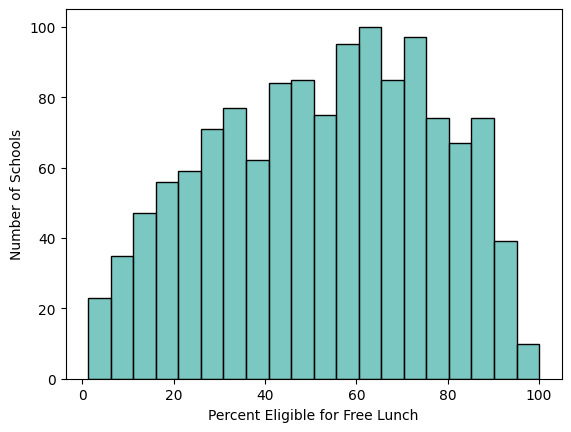

In [13]:
sns.histplot(data = frmp_1819_public_hs, x = 'Percent (%) Eligible Free (K-12)', color = '#4db6ac', binwidth= 5).set(
    xlabel = "Percent Eligible for Free Lunch", ylabel = "Number of Schools")

[Text(0.5, 0, 'Percent Eligible for FRPM'), Text(0, 0.5, 'Number of Schools')]

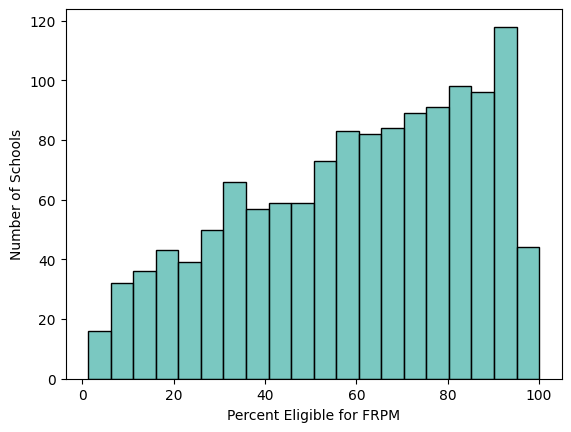

In [14]:
sns.histplot(data = frmp_1819_public_hs, x = 'Percent (%) Eligible FRPM (K-12)', color = '#4db6ac', binwidth = 5).set(
    xlabel = "Percent Eligible for FRPM", ylabel = "Number of Schools")

In [15]:
# District means
frmp_mean = frmp_1819_public_hs.groupby('DistrictCode').agg({
    'Percent (%) Eligible Free (K-12)': 'mean',
    'Percent (%) Eligible FRPM (K-12)': 'mean'
}).reset_index()

frmp_mean.head()

DistrictCode  Percent (%) Eligible Free (K-12)  \
0      0110017                             68.10   
1      0161119                             54.85   
2      0161127                             16.30   
3      0161143                             23.40   
4      0161150                             18.30   

   Percent (%) Eligible FRPM (K-12)  
0                              79.5  
1                              57.8  
2                              18.3  
3                              26.1  
4                              22.2

[Text(0.5, 0, 'Percent Eligible for Free Lunch'),
 Text(0, 0.5, 'Number of Districts')]

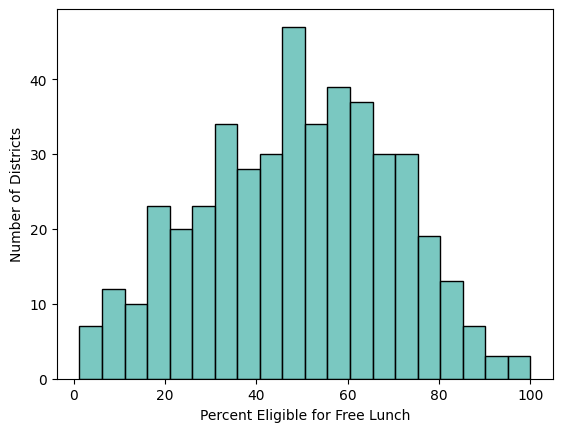

In [16]:
sns.histplot(data = frmp_mean, x = 'Percent (%) Eligible Free (K-12)', color = '#4db6ac', binwidth= 5).set(
    xlabel = "Percent Eligible for Free Lunch", ylabel = "Number of Districts")

In [17]:
import geopandas as gpd

In [18]:
ca_districts_shp = gpd.read_file('/content/drive/MyDrive/MDS/Data 294P/Data and Code/DistrictAreas1819/DistrictAreas1819.shp')

In [19]:
ca_districts_shp.head()

Year    FedID   CDCode         CDSCode CountyName  \
0  2018-19  0601770  0161119  01611190000000    Alameda   
1  2018-19  0601860  0161127  01611270000000    Alameda   
2  2018-19  0604740  0161143  01611430000000    Alameda   
3  2018-19  0607800  0161150  01611500000000    Alameda   
4  2018-19  0612630  0161168  01611680000000    Alameda   

              DistrictNa DistrictTy GradeLow GradeHigh GradeLowCe  ...  \
0        Alameda Unified    Unified       KG        12         KG  ...   
1    Albany City Unified    Unified       KG        12         KG  ...   
2       Berkeley Unified    Unified       KG        12         KG  ...   
3  Castro Valley Unified    Unified       KG        12         KG  ...   
4          Emery Unified    Unified       KG        12         KG  ...   

  CCPrepPct AbsentElig AbsentPct GradCohort GradPct UCCSUReqMe DropOutPct  \
0      56.8      11453       9.4        882    88.9       58.9        5.2   
1      62.6       3763       6.4        301    94.7       63.9        1.7   
2      63.3      10404       9.7        856    87.4       83.3       10.7   
3      57.1       9433       7.4        742    92.6       55.9        3.0   
4      22.5        760      20.5         40   100.0       40.0        0.0   

   EnrollCumu  SuspPct                                           geometry  
0       11600      2.6  MULTIPOLYGON (((-13606221.352 4540862.002, -13...  
1        3830      1.9  POLYGON ((-13612889.056 4565138.930, -13612899...  
2       10534      1.4  POLYGON ((-13609481.010 4565073.896, -13609482...  
3        9532      2.2  MULTIPOLYGON (((-13581537.591 4528171.452, -13...  
4         780      3.6  POLYGON ((-13614035.309 4555653.898, -13613927...  

[5 rows x 67 columns]

In [20]:
district_frmp_join = pd.merge(ca_districts_shp, frmp_mean, left_on='CDCode', right_on='DistrictCode', how='left')
district_frmp_join = district_frmp_join[['Year', 'FedID', 'CDCode', 'DistrictNa', 'Percent (%) Eligible Free (K-12)', 'Percent (%) Eligible FRPM (K-12)', 'geometry']]

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

end_color = "#0c195c"
mid_color = "#4db6ac"  # blue
start_color = "#bdf0e9"    # clementine

# Create a new colormap with these colors
custom_col1 = LinearSegmentedColormap.from_list("custom_col1", [start_color, mid_color, end_color], N=256)


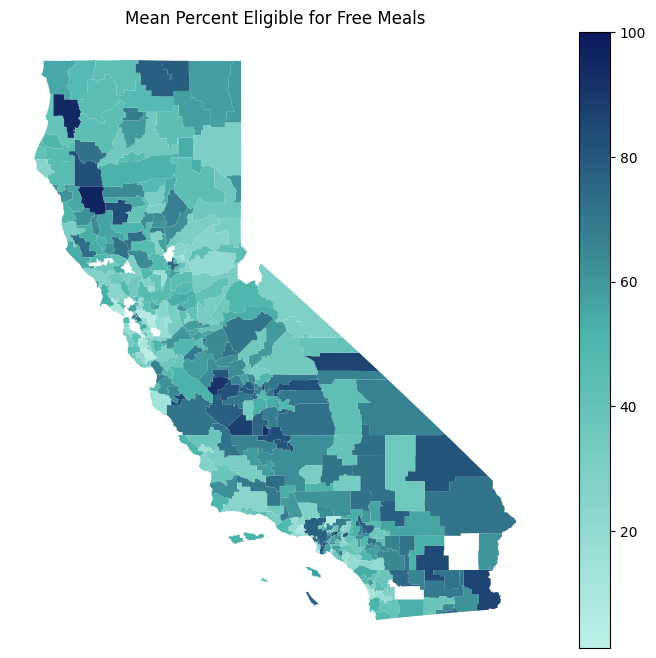

In [22]:
# district_frmp_join.plot(column='Percent (%) Eligible Free (K-12)', cmap=custom_col1, legend=True)

fig, ax = plt.subplots(figsize=(10, 8))
district_frmp_join.plot(column='Percent (%) Eligible Free (K-12)', cmap=custom_col1, legend=True, ax=ax)

# Customize the plot
ax.set_title('Mean Percent Eligible for Free Meals')
ax.set_axis_off()

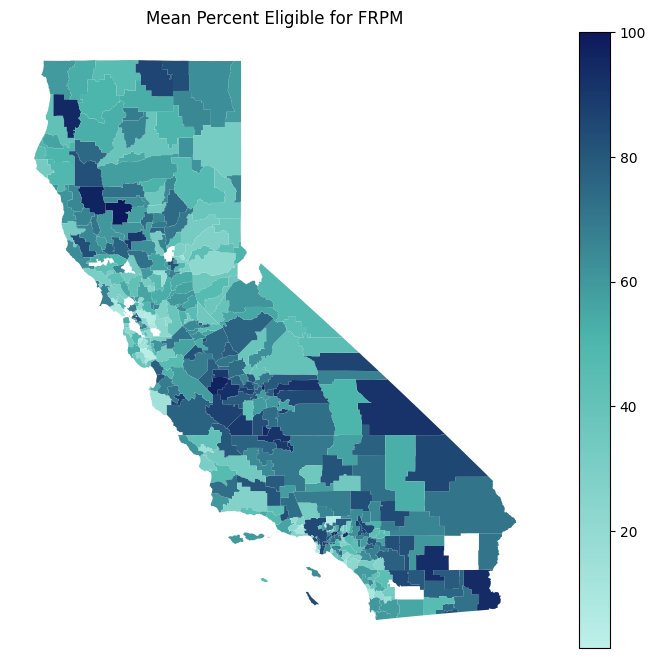

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
district_frmp_join.plot(column='Percent (%) Eligible FRPM (K-12)', cmap=custom_col1, legend=True, ax=ax)

# Customize the plot
ax.set_title('Mean Percent Eligible for FRPM')
ax.set_axis_off()

### Course Enrollment and School Enrollment Data

#### Course Enrollment

In [24]:
# read in course enrollment data
course_enroll1819 = pd.read_csv('/content/drive/My Drive/MDS/Data 294P/Data and Code/CourseEnrollment18.txt', delimiter='\t', encoding = 'latin-1',
                                dtype={'DistrictCode': str, 'SchoolCode': str})

course_enroll1819.head()

AcademicYear DistrictCode SchoolCode       CountyName  \
0          1819      0461457    6003131  BUTTE             
1          1819      0461457    6003131  BUTTE             
2          1819      0461457    6003131  BUTTE             
3          1819      0461457    6003131  BUTTE             
4          1819      0461457    6003131  BUTTE             

                      DistrictName         SchoolName    ClassID  CourseCode  \
0  Golden Feather Union Elementary  Concow Elementary  100_1_3_8        6024   
1  Golden Feather Union Elementary  Concow Elementary  100_1_3_5        2435   
2  Golden Feather Union Elementary  Concow Elementary  100_1_3_7        2822   
3  Golden Feather Union Elementary  Concow Elementary  100_1_2_5        2436   
4  Golden Feather Union Elementary  Concow Elementary  100_1_3_2        2654   

   ClassCourseID GradeLevelCode  ... EnrollAsian  EnrollPacIsl  \
0        6558854             04  ...           0             0   
1        6558851             07  ...           0             0   
2        6558853             06  ...           0             0   
3        6558843             08  ...           0             0   
4        6558847             05  ...           0             0   

   EnrollFilipino  EnrollHispanic  EnrollAfrAm  EnrollWhite  EnrollTwoOrMore  \
0               0               0            0            3                0   
1               0               0            0            7                0   
2               0               0            0            2                1   
3               0               0            0            5                0   
4               0               0            0            1                1   

   EnrollTotal  EnrollEL  FileCreated  
0            3         0   08/22/2019  
1            7         0   08/22/2019  
2            3         0   08/22/2019  
3            5         0   08/22/2019  
4            2         0   08/22/2019  

[5 rows x 23 columns]

In [25]:
course_enroll1819['CDS_CODE'] = course_enroll1819['DistrictCode'] + course_enroll1819['SchoolCode']
# course_enroll1819_HS = course_enroll1819[course_enroll1819['GradeLevelCode'].isin(['09', '10', '11', '12'])]
# course_enroll1819_HS = course_enroll1819_HS[course_enroll1819_HS['SchoolCode'] != '0000000']
# School Code 0 corresponds to district office; want just schools
# 2680 high schools

In [26]:
course_enroll1819_HS = course_enroll1819[course_enroll1819['CDS_CODE'].isin(public_hs)]

In [27]:
course_enroll1819_HS['CDS_CODE'].unique().shape

(1307,)

#### School Enrollment

In [28]:
# Read in total school enrollment data
# Has only public school data
enrollment_1819 = pd.read_csv('/content/drive/My Drive/MDS/Data 294P/Data and Code/enr201719-v2.txt', delimiter='\t',
                              dtype= {'CDS_CODE': str})
enrollment_1819 = enrollment_1819[(enrollment_1819['ACADEMIC_YEAR'] == '2018-19') & (enrollment_1819['ENR_TYPE'] == 'C')]


In [29]:
enrollment_1819.head()

ACADEMIC_YEAR        CDS_CODE   COUNTY  \
260406       2018-19  01100170112607  ALAMEDA   
260407       2018-19  01100170112607  ALAMEDA   
260408       2018-19  01100170112607  ALAMEDA   
260409       2018-19  01100170112607  ALAMEDA   
260410       2018-19  01100170112607  ALAMEDA   

                                  DISTRICT  \
260406  Alameda County Office of Education   
260407  Alameda County Office of Education   
260408  Alameda County Office of Education   
260409  Alameda County Office of Education   
260410  Alameda County Office of Education   

                                        SCHOOL ENR_TYPE  RACE_ETHNICITY  \
260406  Envision Academy for Arts & Technology        C               1   
260407  Envision Academy for Arts & Technology        C               1   
260408  Envision Academy for Arts & Technology        C               2   
260409  Envision Academy for Arts & Technology        C               2   
260410  Envision Academy for Arts & Technology        C               3   

       GENDER  GR_KN  GR_1  ...  GR_7  GR_8  UNGR_ELM  GR_9  GR_10  GR_11  \
260406      F      0     0  ...     0     0       0.0     0      1      1   
260407      M      0     0  ...     0     0       0.0     1      0      0   
260408      F      0     0  ...     0     0       0.0     0      1      2   
260409      M      0     0  ...     0     0       0.0     0      1      1   
260410      F      0     0  ...     0     0       0.0     0      1      1   

        GR_12  UNGR_SEC  ENR_TOTAL  ADULT  
260406      0       0.0          2    0.0  
260407      0       0.0          1    0.0  
260408      1       0.0          4    0.0  
260409      0       0.0          2    0.0  
260410      1       0.0          3    0.0  

[5 rows x 25 columns]

In [30]:
# Get schools only (district offices)
enrollment_1819 = enrollment_1819[~(enrollment_1819['CDS_CODE'].str.endswith('0000000') | enrollment_1819['CDS_CODE'].str.endswith('0000001'))]


In [31]:
hs_enrollment = enrollment_1819[enrollment_1819['CDS_CODE'].isin(public_hs)]
hs_enrollment['CDS_CODE'].unique().shape

(1315,)

In [32]:
# grade_columns = ['GR_KN', 'GR_1', 'GR_2', 'GR_3', 'GR_4',
#        'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'GR_9', 'GR_10', 'GR_11',
#        'GR_12', 'UNGR_SEC']

# # Separate high school grades and other grades
# high_school_grades = ['GR_9', 'GR_10', 'GR_11', 'GR_12']
# other_grades = [col for col in grade_columns if col not in high_school_grades]

# hs_enrollment = enrollment_1819[enrollment_1819[enrollment_1819[high_school_grades] > 0].any(axis=1) &
#     (enrollment_1819[other_grades] == 0).all(axis=1)]

In [33]:
hs_enrollment['CDS_CODE'].unique().shape

(1315,)

In [34]:
hs_enrollment.head()

ACADEMIC_YEAR        CDS_CODE   COUNTY  \
260406       2018-19  01100170112607  ALAMEDA   
260407       2018-19  01100170112607  ALAMEDA   
260408       2018-19  01100170112607  ALAMEDA   
260409       2018-19  01100170112607  ALAMEDA   
260410       2018-19  01100170112607  ALAMEDA   

                                  DISTRICT  \
260406  Alameda County Office of Education   
260407  Alameda County Office of Education   
260408  Alameda County Office of Education   
260409  Alameda County Office of Education   
260410  Alameda County Office of Education   

                                        SCHOOL ENR_TYPE  RACE_ETHNICITY  \
260406  Envision Academy for Arts & Technology        C               1   
260407  Envision Academy for Arts & Technology        C               1   
260408  Envision Academy for Arts & Technology        C               2   
260409  Envision Academy for Arts & Technology        C               2   
260410  Envision Academy for Arts & Technology        C               3   

       GENDER  GR_KN  GR_1  ...  GR_7  GR_8  UNGR_ELM  GR_9  GR_10  GR_11  \
260406      F      0     0  ...     0     0       0.0     0      1      1   
260407      M      0     0  ...     0     0       0.0     1      0      0   
260408      F      0     0  ...     0     0       0.0     0      1      2   
260409      M      0     0  ...     0     0       0.0     0      1      1   
260410      F      0     0  ...     0     0       0.0     0      1      1   

        GR_12  UNGR_SEC  ENR_TOTAL  ADULT  
260406      0       0.0          2    0.0  
260407      0       0.0          1    0.0  
260408      1       0.0          4    0.0  
260409      0       0.0          2    0.0  
260410      1       0.0          3    0.0  

[5 rows x 25 columns]

### Course Assignment Data

#### Data Cleaning

In [35]:
course_assignment_full = pd.read_csv('/content/drive/My Drive/MDS/Data 294P/Data and Code/AssignCodes.csv')


In [36]:
course_assignment = course_assignment_full[['AssignmentCode', 'AssignmentName', 'AssignmentSubject']]
course_assignment.head()
print(course_assignment['AssignmentSubject'].unique())

['Administration' 'Self-Contained Class' 'English Language Arts'
 'Foreign Languages' 'Music' 'Dance' 'Mathematics' 'Computer Education'
 'Physical Education' 'Special Designated Subjects' 'Health Education'
 'Other Instruction-Related Assignments' 'Science'
 'History/Social Science' 'Art' 'Drama/Theater'
 'Agriculture and Natural Resources' 'Marketing, Sales, and Service'
 'Hospitality, Tourism, and Recreation' 'Business and Finance'
 'Health Science and Medical Technology'
 'Education, Child Development, and Family Services'
 'Fashion and Interior Design'
 'Information and Communication Technologies' 'Energy and Utilities'
 'Work Experience' 'Building and Construction Trades'
 'Arts, Media, and Entertainment' 'Engineering and Architecture'
 'Manufacturing and Product Development' 'Transportation'
 'Public Services' 'Multiple Industry Sectors' 'Work Experience Education']


In [37]:
## merge courses with assignment codes
course_enrollment_HS = pd.merge(course_enroll1819_HS, course_assignment,
                             how = 'left',
                             left_on = 'CourseCode', right_on = 'AssignmentCode')

course_enrollment_HS.head()

AcademicYear DistrictCode SchoolCode       CountyName  \
0          1819      0161234    0130054  ALAMEDA           
1          1819      0410041    0134213  BUTTE             
2          1819      0161275    0136515  ALAMEDA           
3          1819      0161275    0136515  ALAMEDA           
4          1819      0161275    0136515  ALAMEDA           

                       DistrictName               SchoolName  \
0                    Newark Unified     Newark Memorial High   
1  Butte County Office of Education  Come Back Butte Charter   
2             Piedmont City Unified            Piedmont High   
3             Piedmont City Unified            Piedmont High   
4             Piedmont City Unified            Piedmont High   

                ClassID  CourseCode  ClassCourseID GradeLevelCode  ...  \
0            4|478|3347        2204        6532820             11  ...   
1             128_Y_1_0        1000        6555319             10  ...   
2   M02-ABDSF-1-17-5063        2709        6545729             11  ...   
3   M02-ABDSF-1-27-7952        2603        6545734             10  ...   
4  M02-ABDSF-1-28-19697        2614        6545735             12  ...   

  EnrollAfrAm  EnrollWhite  EnrollTwoOrMore  EnrollTotal  EnrollEL  \
0           0            0                0            1         0   
1           0            0                0            1         0   
2           0            8                3           15         0   
3           0            0                0            1         0   
4           0            2                0            2         0   

   FileCreated        CDS_CODE  AssignmentCode  \
0   08/22/2019  01612340130054            2204   
1   08/22/2019  04100410134213            1000   
2   08/22/2019  01612750136515            2709   
3   08/22/2019  01612750136515            2603   
4   08/22/2019  01612750136515            2614   

                   AssignmentName       AssignmentSubject  
0  French (first and second year)       Foreign Languages  
1            Self-Contained Class    Self-Contained Class  
2           United States history  History/Social Science  
3                         Biology                 Science  
4                Advanced physics                 Science  

[5 rows x 27 columns]

In [38]:
schools_to_exclude = course_enrollment_HS.groupby('CDS_CODE').filter(lambda x: (x['AssignmentSubject'] == 'Self-Contained Class').all())

In [39]:
schools_reported_courses = course_enrollment_HS[~course_enrollment_HS['CDS_CODE'].isin(schools_to_exclude['CDS_CODE'])]
schools_reported_courses['CDS_CODE'].unique().shape
# exclude schools that didn't report enrollment data (all 'self-contained class')

(1302,)

In [40]:
course_enroll1819_HS_unique = schools_reported_courses.drop_duplicates(subset='CDS_CODE')
course_enroll1819_HS_unique = course_enroll1819_HS_unique[['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']]
hs_enrollment_unique = hs_enrollment.drop_duplicates(subset='CDS_CODE')
hs_enrollment_unique = hs_enrollment_unique[['CDS_CODE', 'DISTRICT', 'SCHOOL']]
print(course_enroll1819_HS_unique.shape, hs_enrollment_unique.shape)

(1302, 4) (1315, 3)


In [41]:
# check which schools do not match
unmatched = pd.merge(
    course_enroll1819_HS_unique,
    hs_enrollment_unique,
    left_on=['CDS_CODE'],
    right_on = ['CDS_CODE'],
    how='outer',
    indicator=True,
).query('_merge != "both"').drop(columns='_merge')

In [42]:
unmatched.shape
# non-publicc schools and schools that didn't report class enrollments

(13, 6)

In [43]:
public_hs_1819 = pd.merge(course_enroll1819_HS_unique,
    hs_enrollment_unique,
    left_on=['CDS_CODE'],
    right_on = ['CDS_CODE'],
    how='inner')

In [44]:
public_hs_1819.shape
# 2400 public high schools (with data)

(1302, 6)

In [45]:
public_hs_1819 = public_hs_1819.drop(columns=['DISTRICT', 'SCHOOL'])

In [46]:
# arts classes
arts_classes = ['Music', 'Art', 'Dance', 'Drama/Theater', 'Arts, Media, and Entertainment']
schools_with_arts = schools_reported_courses[schools_reported_courses['AssignmentSubject'].isin(arts_classes)]

In [47]:
schools_with_arts.head()

AcademicYear DistrictCode SchoolCode       CountyName  \
15          1819      0161275    0136515  ALAMEDA           
23          1819      0161275    0136515  ALAMEDA           
25          1819      0161275    0136515  ALAMEDA           
29          1819      1663982    0136234  KINGS             
38          1819      1663982    0110205  KINGS             

             DistrictName                               SchoolName  \
15  Piedmont City Unified                            Piedmont High   
23  Piedmont City Unified                            Piedmont High   
25  Piedmont City Unified                            Piedmont High   
29     Lemoore Union High  Lemoore Online College Preparatory High   
38     Lemoore Union High              Lemoore Middle College High   

                 ClassID  CourseCode  ClassCourseID GradeLevelCode  ...  \
15  M03-ACDSF-1-AUD-7939        2900        6545787             11  ...   
23   M06-ABDFF-1-30-7695        7219        6545875             11  ...   
25  M06-ABDFF-1-503-1942        2303        6545890             11  ...   
29             12_Y_10_5        2823        6705700             10  ...   
38            9_Y_963_8T        2300        6705630             11  ...   

   EnrollAfrAm  EnrollWhite  EnrollTwoOrMore  EnrollTotal  EnrollEL  \
15           0            0                0            1         0   
23           0            4                1            6         0   
25           0            1                0            2         0   
29           0            0                0            1         0   
38           0            2                0            2         0   

    FileCreated        CDS_CODE  AssignmentCode  \
15   08/22/2019  01612750136515            2900   
23   08/22/2019  01612750136515            7219   
25   08/22/2019  01612750136515            2303   
29   08/22/2019  16639820136234            2823   
38   08/22/2019  16639820110205            2300   

                                     AssignmentName  \
15      Theatre/play production (sec sch standards)   
23                       Introduction to Media Arts   
25                               Orchestra/symphony   
29  Fundamentals of Art(secondary school standards)   
38                                             Band   

                 AssignmentSubject  
15                   Drama/Theater  
23  Arts, Media, and Entertainment  
25                           Music  
29                             Art  
38                           Music  

[5 rows x 27 columns]

### Number of Arts Classes Offered

In [48]:
num_arts_classes_offered = schools_with_arts.groupby(['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']).agg(
    num_classes = pd.NamedAgg(column = 'CourseCode', aggfunc = 'nunique')).reset_index()
num_arts_classes_offered.head()

CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01611190130229      0161119                     Alameda Unified   
2  01611190130625      0161119                     Alameda Unified   
3  01611270130450      0161127                 Albany City Unified   
4  01611430131177      0161143                    Berkeley Unified   

                               SchoolName  num_classes  
0  Envision Academy for Arts & Technology            2  
1                            Alameda High           18  
2                  Alternatives in Action            3  
3                             Albany High           11  
4                           Berkeley High           29

In [49]:
num_arts_classes_offered.shape

(1267, 5)

In [50]:
# merge with rest of schools and replace with 0s
public_hs_arts = pd.merge(public_hs_1819,
                          num_arts_classes_offered,
                          how = 'left',
                          on = ['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName'])

In [51]:
public_hs_arts.head()

CDS_CODE DistrictCode                      DistrictName  \
0  01612340130054      0161234                    Newark Unified   
1  04100410134213      0410041  Butte County Office of Education   
2  01612750136515      0161275             Piedmont City Unified   
3  16639820136234      1663982                Lemoore Union High   
4  16639820110205      1663982                Lemoore Union High   

                                SchoolName  num_classes  
0                     Newark Memorial High         22.0  
1                  Come Back Butte Charter          2.0  
2                            Piedmont High         12.0  
3  Lemoore Online College Preparatory High          1.0  
4              Lemoore Middle College High          2.0

In [52]:
public_hs_arts = public_hs_arts.fillna(0)
public_hs_arts.head()

CDS_CODE DistrictCode                      DistrictName  \
0  01612340130054      0161234                    Newark Unified   
1  04100410134213      0410041  Butte County Office of Education   
2  01612750136515      0161275             Piedmont City Unified   
3  16639820136234      1663982                Lemoore Union High   
4  16639820110205      1663982                Lemoore Union High   

                                SchoolName  num_classes  
0                     Newark Memorial High         22.0  
1                  Come Back Butte Charter          2.0  
2                            Piedmont High         12.0  
3  Lemoore Online College Preparatory High          1.0  
4              Lemoore Middle College High          2.0

In [53]:
public_hs_arts[public_hs_arts['num_classes'] == 0].shape

(35, 5)

#### Visualization

In [54]:
max_classes = public_hs_arts['num_classes'].max()
school_with_max_classes = public_hs_arts[public_hs_arts['num_classes'] == max_classes]
# max number of classes is 35

In [55]:
public_hs_arts['num_classes'].mean()

11.280337941628265

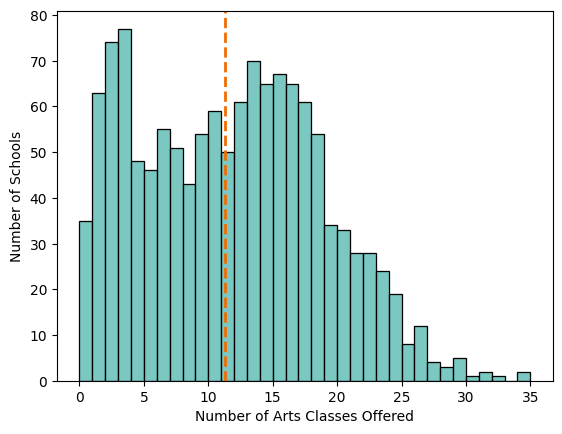

In [56]:
sns.histplot(data=public_hs_arts, x='num_classes', binwidth=1, color = '#4db6ac').set(
  xlabel = 'Number of Arts Classes Offered', ylabel = 'Number of Schools')
mean_value = public_hs_arts['num_classes'].mean()  # Calculate the mean or any other value
plt.axvline(x=mean_value, color='#ef6c02', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')


In [57]:
district_arts1819 = public_hs_arts.groupby(['DistrictCode'])['num_classes'].mean().reset_index()
district_arts1819.head()

DistrictCode  num_classes
0      0110017          2.0
1      0161119         10.5
2      0161127         11.0
3      0161143         29.0
4      0161150         21.0

In [58]:
districtarts_join = pd.merge(ca_districts_shp, district_arts1819, left_on='CDCode', right_on='DistrictCode', how='left')
districtarts_join = districtarts_join[['Year', 'FedID', 'CDCode', 'DistrictNa', 'num_classes', 'geometry']]
districtarts_join.head()

Year    FedID   CDCode             DistrictNa  num_classes  \
0  2018-19  0601770  0161119        Alameda Unified         10.5   
1  2018-19  0601860  0161127    Albany City Unified         11.0   
2  2018-19  0604740  0161143       Berkeley Unified         29.0   
3  2018-19  0607800  0161150  Castro Valley Unified         21.0   
4  2018-19  0612630  0161168          Emery Unified          5.0   

                                            geometry  
0  MULTIPOLYGON (((-13606221.352 4540862.002, -13...  
1  POLYGON ((-13612889.056 4565138.930, -13612899...  
2  POLYGON ((-13609481.010 4565073.896, -13609482...  
3  MULTIPOLYGON (((-13581537.591 4528171.452, -13...  
4  POLYGON ((-13614035.309 4555653.898, -13613927...

In [59]:
# color map
#4db6ac light blue
#ef6c02 clementine


start_color = "#0c195c"
mid_color = "#4db6ac"  # blue
end_color = "#bdf0e9"    # clementine

# Create a new colormap with these colors
custom_col = LinearSegmentedColormap.from_list("custom_col", [start_color, mid_color, end_color], N=256)


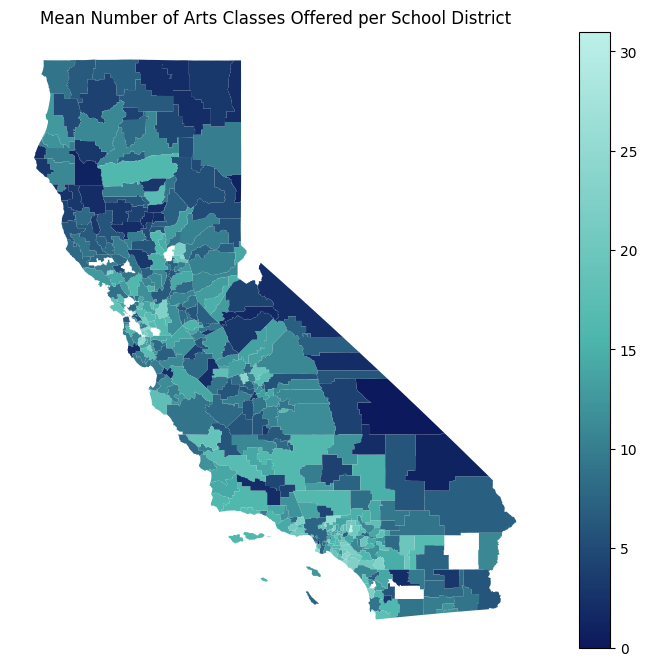

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
districtarts_join.plot(column='num_classes', cmap=custom_col, legend=True, ax=ax)

# Customize the plot
ax.set_title('Mean Number of Arts Classes Offered per School District')
ax.set_axis_off()

[Text(0.5, 0, 'Mean Number of Arts Classes Offered'),
 Text(0, 0.5, 'Number of Districts')]

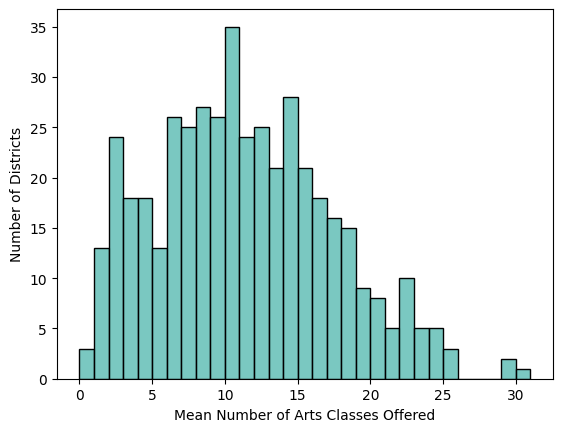

In [61]:
sns.histplot(data = district_arts1819, x = 'num_classes', binwidth = 1, color = '#4db6ac').set(
    xlabel = "Mean Number of Arts Classes Offered", ylabel = "Number of Districts")


#### By Arts Category

In [62]:
num_arts_classes_category = schools_with_arts.groupby(['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName', 'AssignmentSubject']).agg(
    num_classes = pd.NamedAgg(column = 'CourseCode', aggfunc = 'nunique')).reset_index()

num_arts_classes_category.head()

CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01100170112607      0110017  Alameda County Office of Education   
2  01611190130229      0161119                     Alameda Unified   
3  01611190130229      0161119                     Alameda Unified   
4  01611190130229      0161119                     Alameda Unified   

                               SchoolName               AssignmentSubject  \
0  Envision Academy for Arts & Technology                             Art   
1  Envision Academy for Arts & Technology                   Drama/Theater   
2                            Alameda High                             Art   
3                            Alameda High  Arts, Media, and Entertainment   
4                            Alameda High                           Dance   

   num_classes  
0            1  
1            1  
2            4  
3            5  
4            1

In [63]:
#arts schools
num_arts_classes_pivot = num_arts_classes_category.pivot(
    index=['CDS_CODE', 'DistrictName', 'SchoolName'],
    columns='AssignmentSubject',
    values='num_classes').reset_index()

# num_arts_classes_pivot.columns.name = None  # Remove the aggregation name
# num_arts_classes_pivot.rename(columns={'Art': 'Art_Enr', 'Drama/Theater': 'Theater_Enr', 'Music': 'Music_Enr',
#                                        'Arts, Media, and Entertainment': 'ArtsMediaEnt_Enr', 'Dance': 'Dance_Enr'}, inplace=True)
num_arts_classes_pivot.fillna(0, inplace = True)

num_arts_classes_pivot.head()

AssignmentSubject        CDS_CODE                        DistrictName  \
0                  01100170112607  Alameda County Office of Education   
1                  01611190130229                     Alameda Unified   
2                  01611190130625                     Alameda Unified   
3                  01611270130450                 Albany City Unified   
4                  01611430131177                    Berkeley Unified   

AssignmentSubject                              SchoolName  Art  \
0                  Envision Academy for Arts & Technology  1.0   
1                                            Alameda High  4.0   
2                                  Alternatives in Action  1.0   
3                                             Albany High  5.0   
4                                           Berkeley High  8.0   

AssignmentSubject  Arts, Media, and Entertainment  Dance  Drama/Theater  Music  
0                                             0.0    0.0            1.0    0.0  
1                                             5.0    1.0            3.0    5.0  
2                                             1.0    0.0            1.0    0.0  
3                                             2.0    1.0            0.0    3.0  
4                                             8.0    3.0            2.0    8.0

In [64]:
# all schools
all_class_enroll_cat = pd.merge(public_hs_arts, num_arts_classes_pivot, how = 'left', left_on = ['CDS_CODE', 'DistrictName', 'SchoolName'],
                                right_on = ['CDS_CODE', 'DistrictName', 'SchoolName'])
all_class_enroll_cat.drop(columns = ['num_classes'], inplace = True)
all_class_enroll_cat.fillna(0, inplace = True)
all_class_enroll_cat.head()

CDS_CODE DistrictCode                      DistrictName  \
0  01612340130054      0161234                    Newark Unified   
1  04100410134213      0410041  Butte County Office of Education   
2  01612750136515      0161275             Piedmont City Unified   
3  16639820136234      1663982                Lemoore Union High   
4  16639820110205      1663982                Lemoore Union High   

                                SchoolName  Art  \
0                     Newark Memorial High  7.0   
1                  Come Back Butte Charter  2.0   
2                            Piedmont High  4.0   
3  Lemoore Online College Preparatory High  1.0   
4              Lemoore Middle College High  1.0   

   Arts, Media, and Entertainment  Dance  Drama/Theater  Music  
0                             8.0    0.0            4.0    3.0  
1                             0.0    0.0            0.0    0.0  
2                             1.0    1.0            2.0    4.0  
3                             0.0    0.0            0.0    0.0  
4                             0.0    0.0            0.0    1.0

In [65]:
num_class_cat = all_class_enroll_cat.melt(id_vars = ['CDS_CODE',	'DistrictCode','DistrictName',	'SchoolName'],
                              var_name = "Subject",
                              value_name = "Total")

num_class_cat.head()


CDS_CODE DistrictCode                      DistrictName  \
0  01612340130054      0161234                    Newark Unified   
1  04100410134213      0410041  Butte County Office of Education   
2  01612750136515      0161275             Piedmont City Unified   
3  16639820136234      1663982                Lemoore Union High   
4  16639820110205      1663982                Lemoore Union High   

                                SchoolName Subject  Total  
0                     Newark Memorial High     Art    7.0  
1                  Come Back Butte Charter     Art    2.0  
2                            Piedmont High     Art    4.0  
3  Lemoore Online College Preparatory High     Art    1.0  
4              Lemoore Middle College High     Art    1.0

Text(0, 0.5, '')

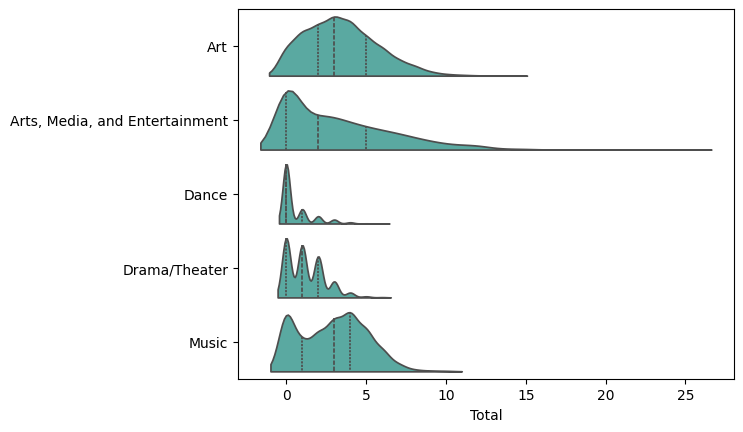

In [66]:
# filtered_data = num_class_cat[num_class_cat['Subject'] != 'Arts, Media, and Entertainment']

sns.violinplot(data=num_class_cat, x="Total", y="Subject", split = "True", inner="quart", density_norm='count', color = '#4db6ac').set_ylabel('')


In [67]:
mean_arts_district = num_class_cat.groupby(['DistrictCode', 'Subject'])['Total'].mean().reset_index()
mean_arts_district.head(20)

DistrictCode                         Subject  Total
0       0110017                             Art    1.0
1       0110017  Arts, Media, and Entertainment    0.0
2       0110017                           Dance    0.0
3       0110017                   Drama/Theater    1.0
4       0110017                           Music    0.0
5       0161119                             Art    2.5
6       0161119  Arts, Media, and Entertainment    3.0
7       0161119                           Dance    0.5
8       0161119                   Drama/Theater    2.0
9       0161119                           Music    2.5
10      0161127                             Art    5.0
11      0161127  Arts, Media, and Entertainment    2.0
12      0161127                           Dance    1.0
13      0161127                   Drama/Theater    0.0
14      0161127                           Music    3.0
15      0161143                             Art    8.0
16      0161143  Arts, Media, and Entertainment    8.0
17      0161143                           Dance    3.0
18      0161143                   Drama/Theater    2.0
19      0161143                           Music    8.0

In [68]:
mean_arts_frpm = pd.merge(mean_arts_district, frmp_1819_public_hs, how = 'inner', left_on = 'DistrictCode', right_on = 'DistrictCode')
mean_arts_frpm

DistrictCode                         Subject  Total        CDS_CODE  \
0         0110017                             Art    1.0  01100170112607   
1         0110017  Arts, Media, and Entertainment    0.0  01100170112607   
2         0110017                           Dance    0.0  01100170112607   
3         0110017                   Drama/Theater    1.0  01100170112607   
4         0110017                           Music    0.0  01100170112607   
...           ...                             ...    ...             ...   
6535      5872769                             Art    2.0  58727695838305   
6536      5872769  Arts, Media, and Entertainment    3.0  58727695838305   
6537      5872769                           Dance    1.0  58727695838305   
6538      5872769                   Drama/Theater    0.0  58727695838305   
6539      5872769                           Music    3.0  58727695838305   

                           District Name  \
0     Alameda County Office of Education   
1     Alameda County Office of Education   
2     Alameda County Office of Education   
3     Alameda County Office of Education   
4     Alameda County Office of Education   
...                                  ...   
6535                Wheatland Union High   
6536                Wheatland Union High   
6537                Wheatland Union High   
6538                Wheatland Union High   
6539                Wheatland Union High   

                                 School Name  \
0     Envision Academy for Arts & Technology   
1     Envision Academy for Arts & Technology   
2     Envision Academy for Arts & Technology   
3     Envision Academy for Arts & Technology   
4     Envision Academy for Arts & Technology   
...                                      ...   
6535                    Wheatland Union High   
6536                    Wheatland Union High   
6537                    Wheatland Union High   
6538                    Wheatland Union High   
6539                    Wheatland Union High   

      Percent (%) Eligible Free (K-12)  Percent (%) Eligible FRPM (K-12)  
0                                 68.1                              79.5  
1                                 68.1                              79.5  
2                                 68.1                              79.5  
3                                 68.1                              79.5  
4                                 68.1                              79.5  
...                                ...                               ...  
6535                              33.2                              44.1  
6536                              33.2                              44.1  
6537                              33.2                              44.1  
6538                              33.2                              44.1  
6539                              33.2                              44.1  

[6540 rows x 8 columns]

In [69]:
mean_art = mean_arts_frpm[mean_arts_frpm['Subject'] == 'Art']
mean_ame = mean_arts_frpm[mean_arts_frpm['Subject'] == 'Arts, Media, and Entertainment']
mean_dance = mean_arts_frpm[mean_arts_frpm['Subject'] == 'Dance']
mean_drama = mean_arts_frpm[mean_arts_frpm['Subject'] == 'Drama/Theater']
mean_music = mean_arts_frpm[mean_arts_frpm['Subject'] == 'Music']

<Axes: xlabel='Percent (%) Eligible Free (K-12)', ylabel='Total'>

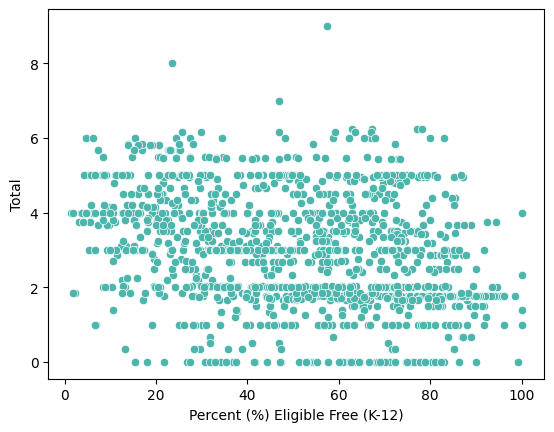

In [70]:
sns.scatterplot(data = mean_music, y = 'Total', x = 'Percent (%) Eligible Free (K-12)', color = '#4db6ac')

In [71]:
median_values = num_class_cat.groupby('Subject')['Total'].median().reset_index()
mean_values = num_class_cat.groupby('Subject')['Total'].mean().reset_index()
median_values

Subject  Total
0                             Art    3.0
1  Arts, Media, and Entertainment    2.0
2                           Dance    0.0
3                   Drama/Theater    1.0
4                           Music    3.0

In [72]:
mean_values

Subject     Total
0                             Art  3.435484
1  Arts, Media, and Entertainment  3.224270
2                           Dance  0.537634
3                   Drama/Theater  1.193548
4                           Music  2.889401

#### By FRPM

In [73]:
print(public_hs_arts.shape, frmp_1819_public_hs.shape)

(1302, 5) (1315, 6)


In [74]:
public_hs_arts.head()

CDS_CODE DistrictCode                      DistrictName  \
0  01612340130054      0161234                    Newark Unified   
1  04100410134213      0410041  Butte County Office of Education   
2  01612750136515      0161275             Piedmont City Unified   
3  16639820136234      1663982                Lemoore Union High   
4  16639820110205      1663982                Lemoore Union High   

                                SchoolName  num_classes  
0                     Newark Memorial High         22.0  
1                  Come Back Butte Charter          2.0  
2                            Piedmont High         12.0  
3  Lemoore Online College Preparatory High          1.0  
4              Lemoore Middle College High          2.0

In [75]:
frmp_1819_public_hs.head()

CDS_CODE DistrictCode                       District Name  \
0   01100170112607      0110017  Alameda County Office of Education   
20  01611190130229      0161119                     Alameda Unified   
22  01611190130625      0161119                     Alameda Unified   
38  01611270130450      0161127                 Albany City Unified   
44  01611430131177      0161143                    Berkeley Unified   

                               School Name  Percent (%) Eligible Free (K-12)  \
0   Envision Academy for Arts & Technology                              68.1   
20                            Alameda High                              19.6   
22                  Alternatives in Action                              90.1   
38                             Albany High                              16.3   
44                           Berkeley High                              23.4   

    Percent (%) Eligible FRPM (K-12)  
0                               79.5  
20                              21.0  
22                              94.6  
38                              18.3  
44                              26.1

In [76]:
frpm_arts = pd.merge(public_hs_arts, frmp_1819_public_hs, how = 'inner', left_on = 'CDS_CODE', right_on = 'CDS_CODE')
frpm_arts.drop(columns = ['District Name', 'School Name', 'DistrictCode_y'], inplace = True)
frpm_arts.rename(columns = {'DistrictCode_x': 'DistrictCode'}, inplace = True)
frpm_arts.head()

CDS_CODE DistrictCode                      DistrictName  \
0  01612340130054      0161234                    Newark Unified   
1  04100410134213      0410041  Butte County Office of Education   
2  01612750136515      0161275             Piedmont City Unified   
3  16639820136234      1663982                Lemoore Union High   
4  16639820110205      1663982                Lemoore Union High   

                                SchoolName  num_classes  \
0                     Newark Memorial High         22.0   
1                  Come Back Butte Charter          2.0   
2                            Piedmont High         12.0   
3  Lemoore Online College Preparatory High          1.0   
4              Lemoore Middle College High          2.0   

   Percent (%) Eligible Free (K-12)  Percent (%) Eligible FRPM (K-12)  
0                              39.2                              45.5  
1                              80.3                              90.2  
2                               1.3                               1.3  
3                              30.8                              42.3  
4                              23.7                              27.5

<Axes: xlabel='Percent (%) Eligible Free (K-12)', ylabel='num_classes'>

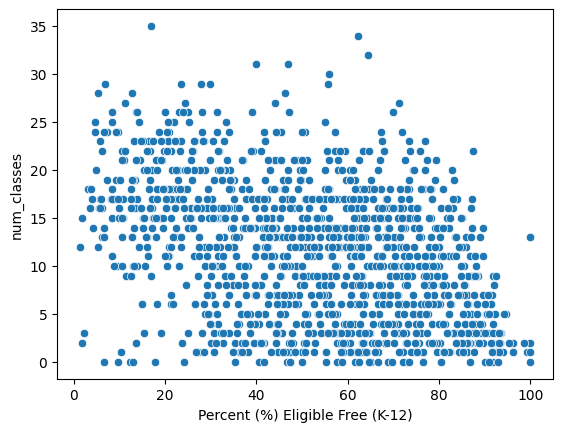

In [77]:
sns.scatterplot(data = frpm_arts, x = 'Percent (%) Eligible Free (K-12)', y = 'num_classes')

<Axes: xlabel='Percent (%) Eligible FRPM (K-12)', ylabel='num_classes'>

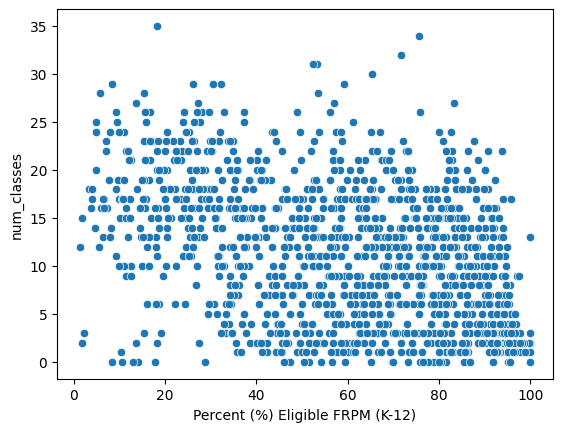

In [78]:
sns.scatterplot(data = frpm_arts, x = 'Percent (%) Eligible FRPM (K-12)', y = 'num_classes')

In [79]:
# per district?
frpm_arts_district = frpm_arts.groupby('DistrictCode').agg({
    'Percent (%) Eligible Free (K-12)': 'mean',
    'Percent (%) Eligible FRPM (K-12)': 'mean',
    'num_classes': 'mean'
}).reset_index()

In [80]:
frpm_arts_district.corr()

DistrictCode  \
DistrictCode                          1.000000   
Percent (%) Eligible Free (K-12)     -0.073840   
Percent (%) Eligible FRPM (K-12)     -0.077525   
num_classes                          -0.006832   

                                  Percent (%) Eligible Free (K-12)  \
DistrictCode                                             -0.073840   
Percent (%) Eligible Free (K-12)                          1.000000   
Percent (%) Eligible FRPM (K-12)                          0.985447   
num_classes                                              -0.483708   

                                  Percent (%) Eligible FRPM (K-12)  \
DistrictCode                                             -0.077525   
Percent (%) Eligible Free (K-12)                          0.985447   
Percent (%) Eligible FRPM (K-12)                          1.000000   
num_classes                                              -0.468711   

                                  num_classes  
DistrictCode                        -0.006832  
Percent (%) Eligible Free (K-12)    -0.483708  
Percent (%) Eligible FRPM (K-12)    -0.468711  
num_classes                          1.000000

[Text(0, 0.5, 'Mean Number of Classes'),
 Text(0.5, 1.0, 'Number of Classes vs % Free Meal Qualification per School District')]

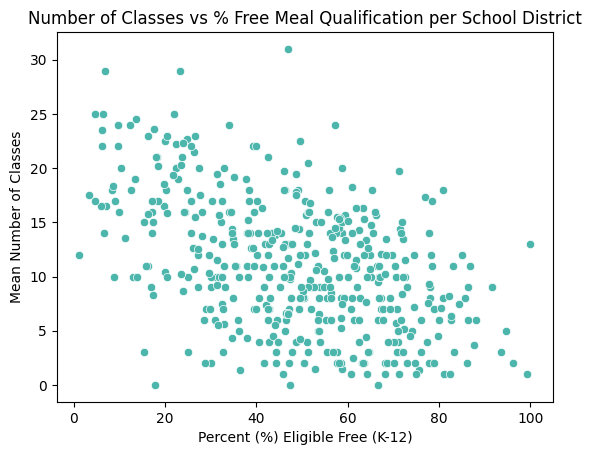

In [81]:
sns.scatterplot(data = frpm_arts_district, x = 'Percent (%) Eligible Free (K-12)', y = 'num_classes', color = '#4db6ac').set(
    ylabel = 'Mean Number of Classes', title = 'Number of Classes vs % Free Meal Qualification per School District')

[Text(0, 0.5, 'Mean Number of Classes'),
 Text(0.5, 1.0, 'Number of Classes vs % FRPM Qualification per School District')]

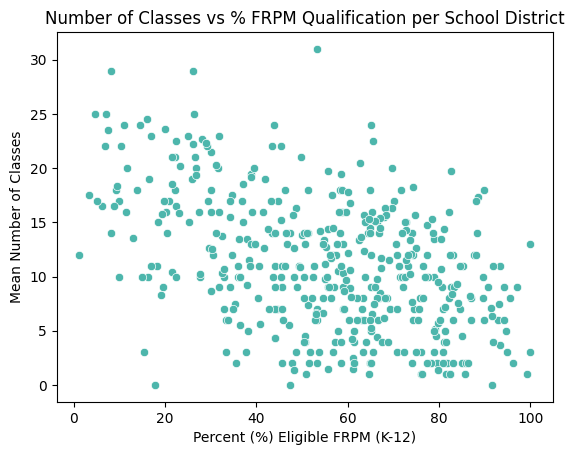

In [82]:
sns.scatterplot(data = frpm_arts_district, x = 'Percent (%) Eligible FRPM (K-12)', y = 'num_classes', color = '#4db6ac').set(
    ylabel = 'Mean Number of Classes', title = 'Number of Classes vs % FRPM Qualification per School District')

##### Significance Test

In [83]:
# Testing if there is a significant difference in number of arts classes beween high and low poverty schools
frpm_arts_pov = frpm_arts
frpm_arts_pov['Poverty_Level'] = pd.cut(frpm_arts['Percent (%) Eligible Free (K-12)'], bins=[0,25,50,75,100], labels=['Low', 'MidLow', 'MidHigh', 'High'], right=False)

frpm_arts_pov.head()


CDS_CODE DistrictCode                      DistrictName  \
0  01612340130054      0161234                    Newark Unified   
1  04100410134213      0410041  Butte County Office of Education   
2  01612750136515      0161275             Piedmont City Unified   
3  16639820136234      1663982                Lemoore Union High   
4  16639820110205      1663982                Lemoore Union High   

                                SchoolName  num_classes  \
0                     Newark Memorial High         22.0   
1                  Come Back Butte Charter          2.0   
2                            Piedmont High         12.0   
3  Lemoore Online College Preparatory High          1.0   
4              Lemoore Middle College High          2.0   

   Percent (%) Eligible Free (K-12)  Percent (%) Eligible FRPM (K-12)  \
0                              39.2                              45.5   
1                              80.3                              90.2   
2                               1.3                               1.3   
3                              30.8                              42.3   
4                              23.7                              27.5   

  Poverty_Level  
0        MidLow  
1          High  
2           Low  
3        MidLow  
4           Low

In [84]:
# Testing if there is a significant difference in number of arts classes beween high and low poverty schools
red_arts_pov = frpm_arts
red_arts_pov['Poverty_Level'] = pd.cut(frpm_arts['Percent (%) Eligible FRPM (K-12)'], bins=[0,25,50,75,100], labels=['Low', 'MidLow', 'MidHigh', 'High'], right=False)

red_arts_pov.head()


CDS_CODE DistrictCode                      DistrictName  \
0  01612340130054      0161234                    Newark Unified   
1  04100410134213      0410041  Butte County Office of Education   
2  01612750136515      0161275             Piedmont City Unified   
3  16639820136234      1663982                Lemoore Union High   
4  16639820110205      1663982                Lemoore Union High   

                                SchoolName  num_classes  \
0                     Newark Memorial High         22.0   
1                  Come Back Butte Charter          2.0   
2                            Piedmont High         12.0   
3  Lemoore Online College Preparatory High          1.0   
4              Lemoore Middle College High          2.0   

   Percent (%) Eligible Free (K-12)  Percent (%) Eligible FRPM (K-12)  \
0                              39.2                              45.5   
1                              80.3                              90.2   
2                               1.3                               1.3   
3                              30.8                              42.3   
4                              23.7                              27.5   

  Poverty_Level  
0        MidLow  
1          High  
2           Low  
3        MidLow  
4        MidLow

[Text(0.5, 0, 'Poverty Level (Free Meals)'),
 Text(0, 0.5, 'Number of Arts Classes Offered')]

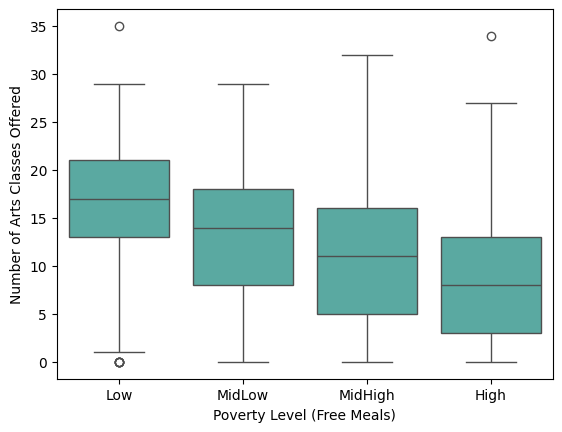

In [85]:
sns.boxplot(data=frpm_arts_pov, x='Poverty_Level', y='num_classes', color = '#4db6ac').set(
    xlabel = 'Poverty Level (Free Meals)', ylabel = 'Number of Arts Classes Offered'
)

[Text(0.5, 0, 'Poverty Level (FRPM)'),
 Text(0, 0.5, 'Number of Arts Classes Offered')]

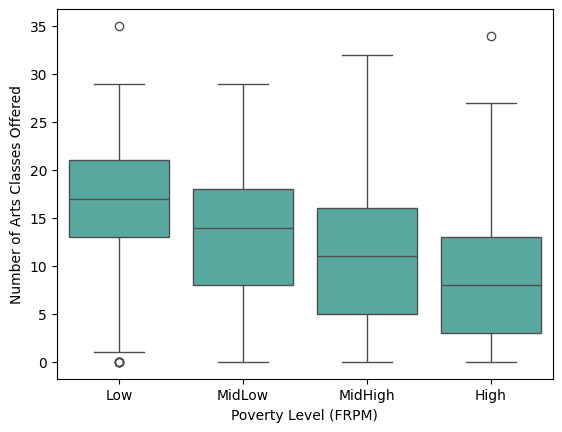

In [86]:
sns.boxplot(data=red_arts_pov, x='Poverty_Level', y='num_classes', color = '#4db6ac').set(
    xlabel = 'Poverty Level (FRPM)', ylabel = 'Number of Arts Classes Offered')


In [91]:
# poverty level num classes mean
mean_arts_pov = frpm_arts_pov.groupby('Poverty_Level')['num_classes'].mean().reset_index()
mean_arts_pov_red = red_arts_pov.groupby('Poverty_Level')['num_classes'].mean().reset_index()
mean_arts_pov_red

<ipython-input-91-54675a2c63a6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_arts_pov = frpm_arts_pov.groupby('Poverty_Level')['num_classes'].mean().reset_index()
<ipython-input-91-54675a2c63a6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_arts_pov_red = red_arts_pov.groupby('Poverty_Level')['num_classes'].mean().reset_index()


Poverty_Level  num_classes
0           Low    16.320261
1        MidLow    13.326316
2       MidHigh    10.988010
3          High     8.586364

In [100]:
observedVariance =  mean_arts_pov['num_classes'].var()
observedVariance

10.909376756535073

In [101]:
observedVariance_red = mean_arts_pov_red['num_classes'].var()
observedVariance_red

10.909376756535073

In [102]:
frpm_arts_pov.groupby('Poverty_Level')['num_classes'].count().reset_index()


<ipython-input-102-098c5c83fff7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frpm_arts_pov.groupby('Poverty_Level')['num_classes'].count().reset_index()


Poverty_Level  num_classes
0           Low          153
1        MidLow          285
2       MidHigh          417
3          High          440

In [103]:
red_arts_pov.groupby('Poverty_Level')['num_classes'].count().reset_index()


<ipython-input-103-9410b7c20768>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  red_arts_pov.groupby('Poverty_Level')['num_classes'].count().reset_index()


Poverty_Level  num_classes
0           Low          153
1        MidLow          285
2       MidHigh          417
3          High          440

In [104]:
singleBox = frpm_arts_pov['num_classes']
sampleLow = singleBox.sample(206, replace=True)
sampleMidL = singleBox.sample(373, replace=True)
sampleMidH = singleBox.sample(456, replace=True)
sampleHigh = singleBox.sample(262, replace=True)
sampleDataFrame = pd.DataFrame([sampleLow.values, sampleMidL.values,sampleMidH.values, sampleHigh.values]).T
sampleDataFrame.mean().var()

0.03839396022552574

In [105]:
singleBox

0       22.0
1        2.0
2       12.0
3        1.0
4        2.0
        ... 
1297    11.0
1298    16.0
1299    12.0
1300     1.0
1301     2.0
Name: num_classes, Length: 1302, dtype: float64

In [106]:
artsPovdata = {
    'LowPov': frpm_arts[frpm_arts['Percent (%) Eligible Free (K-12)'] <= 25]['num_classes'],
    'ModPov': frpm_arts[(frpm_arts['Percent (%) Eligible Free (K-12)'] > 25) & (frpm_arts['Percent (%) Eligible Free (K-12)'] < 75)]['num_classes'],
    'HighPov': frpm_arts[frpm_arts['Percent (%) Eligible Free (K-12)'] >= 75]['num_classes']
}

artsData = pd.DataFrame(artsPovdata)
artsData.head()


LowPov  ModPov  HighPov
0     NaN    22.0      NaN
1     NaN     NaN      2.0
2    12.0     NaN      NaN
3     NaN     1.0      NaN
4     2.0     NaN      NaN

In [107]:
import numpy as np

def permutationTest(num_arts_df):
  singleBox = frpm_arts_pov['num_classes']
  sampleLow = singleBox.sample(153, replace=True)
  sampleMidL = singleBox.sample(285, replace=True)
  sampleMidH = singleBox.sample(417, replace=True)
  sampleHigh = singleBox.sample(440, replace=True)
  sampleDataFrame = pd.DataFrame([sampleLow.values, sampleMidL.values,sampleMidH.values, sampleHigh.values]).T
  return sampleDataFrame.mean().var()

permutationVariance = [permutationTest(red_arts_pov) for _ in range(3000)]
prob = np.mean([var > observedVariance for var in permutationVariance])
prob

0.0

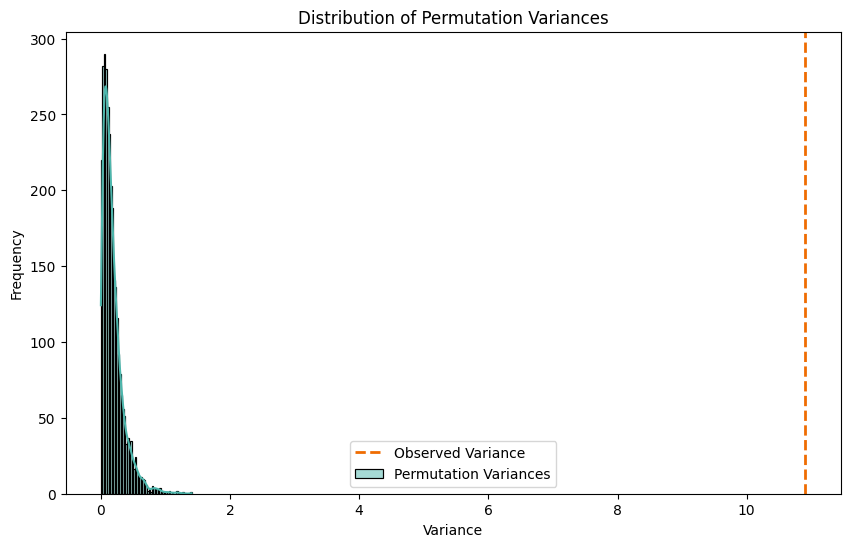

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(permutationVariance, kde=True, color='#4db6ac', label='Permutation Variances')
plt.axvline(observedVariance_red, color='#ef6c02', linestyle='--', linewidth=2, label='Observed Variance')
plt.title('Distribution of Permutation Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Ethnicity

In [109]:
schools_with_arts['CDS_CODE'].unique().shape

(1267,)

In [110]:
# percent of class for each ethnicity, average --> percent of arts class enrollment for each ethnicity
# percent of total school enrollment for each ethnicity?

In [111]:
#unique arts classes offered per school and number of students enrolled in each class by ethnicity
num_enrolled_arts_eth = schools_with_arts.groupby(['CDS_CODE', 'DistrictName', 'SchoolName', 'CourseCode', 'AssignmentName', 'AssignmentSubject']).agg(
    total_EnrollNoEthRptd = pd.NamedAgg(column = 'EnrollNoEthRptd', aggfunc='sum'),
    total_EnrollAmInd = pd.NamedAgg(column = 'EnrollAmInd', aggfunc='sum'),
    total_EnrollAsian = pd.NamedAgg(column = 'EnrollAsian', aggfunc='sum'),
    total_EnrollPacIsl = pd.NamedAgg(column = 'EnrollPacIsl', aggfunc='sum'),
    total_EnrollFilipino = pd.NamedAgg(column = 'EnrollFilipino', aggfunc='sum'),
    total_EnrollHispanic = pd.NamedAgg(column = 'EnrollHispanic', aggfunc='sum'),
    total_EnrollAfrAm = pd.NamedAgg(column = 'EnrollAfrAm', aggfunc='sum'),
    total_EnrollWhite = pd.NamedAgg(column = 'EnrollWhite', aggfunc='sum'),
    total_EnrollTwoOrMore = pd.NamedAgg(column = 'EnrollTwoOrMore', aggfunc='sum'),
    total_EnrollTotal = pd.NamedAgg(column = 'EnrollTotal', aggfunc='sum'),
    total_EnrollEL = pd.NamedAgg(column = 'EnrollEL', aggfunc='sum')
    ).reset_index()
num_enrolled_arts_eth.head(20)

CDS_CODE                        DistrictName  \
0   01100170112607  Alameda County Office of Education   
1   01100170112607  Alameda County Office of Education   
2   01611190130229                     Alameda Unified   
3   01611190130229                     Alameda Unified   
4   01611190130229                     Alameda Unified   
5   01611190130229                     Alameda Unified   
6   01611190130229                     Alameda Unified   
7   01611190130229                     Alameda Unified   
8   01611190130229                     Alameda Unified   
9   01611190130229                     Alameda Unified   
10  01611190130229                     Alameda Unified   
11  01611190130229                     Alameda Unified   
12  01611190130229                     Alameda Unified   
13  01611190130229                     Alameda Unified   
14  01611190130229                     Alameda Unified   
15  01611190130229                     Alameda Unified   
16  01611190130229                     Alameda Unified   
17  01611190130229                     Alameda Unified   
18  01611190130229                     Alameda Unified   
19  01611190130229                     Alameda Unified   

                                SchoolName  CourseCode  \
0   Envision Academy for Arts & Technology        2820   
1   Envision Academy for Arts & Technology        2900   
2                             Alameda High        2300   
3                             Alameda High        2303   
4                             Alameda High        2305   
5                             Alameda High        2322   
6                             Alameda High        2325   
7                             Alameda High        2352   
8                             Alameda High        2805   
9                             Alameda High        2816   
10                            Alameda High        2823   
11                            Alameda High        2874   
12                            Alameda High        2900   
13                            Alameda High        2904   
14                            Alameda High        2905   
15                            Alameda High        7210   
16                            Alameda High        7211   
17                            Alameda High        7212   
18                            Alameda High        7244   
19                            Alameda High        7245   

                                       AssignmentName  \
0         Digital  Art/Computer Art/Artistic Graphics   
1         Theatre/play production (sec sch standards)   
2                                                Band   
3                                  Orchestra/symphony   
4                         Chorus/choir/vocal ensemble   
5                                     Musical theater   
6       Instrumental music lessons (sec school stand)   
7                   Dance choreography and production   
8                 Photography (Beginning or Advanced)   
9       Art appreciation (secondary school standards)   
10    Fundamentals of Art(secondary school standards)   
11                             AP Studio Art: Drawing   
12        Theatre/play production (sec sch standards)   
13                                   Advanced Theater   
14                       Technical theater/stagecraft   
15                     Introduction to Graphic Design   
16         Intermediate Graphic Design (Concentrator)   
17                 Advanced Graphic Design (Capstone)   
18  Intermediate Film/Video Production (Concentrator)   
19          Advanced Film/Video Production (Capstone)   

                 AssignmentSubject  total_EnrollNoEthRptd  total_EnrollAmInd  \
0                              Art                      0                  0   
1                    Drama/Theater                      0                  1   
2                            Music                      1                  0   
3                            Music                    

#### Trying to get proportions per ethnicity


In [112]:
public_hs_1819_codes = public_hs_1819['CDS_CODE'].unique()

In [168]:
schools_eth = schools_reported_courses[schools_reported_courses['CDS_CODE'].isin(public_hs_1819_codes)]
schools_eth.head()

AcademicYear DistrictCode SchoolCode       CountyName  \
0          1819      0161234    0130054  ALAMEDA           
1          1819      0410041    0134213  BUTTE             
2          1819      0161275    0136515  ALAMEDA           
3          1819      0161275    0136515  ALAMEDA           
4          1819      0161275    0136515  ALAMEDA           

                       DistrictName               SchoolName  \
0                    Newark Unified     Newark Memorial High   
1  Butte County Office of Education  Come Back Butte Charter   
2             Piedmont City Unified            Piedmont High   
3             Piedmont City Unified            Piedmont High   
4             Piedmont City Unified            Piedmont High   

                ClassID  CourseCode  ClassCourseID GradeLevelCode  ...  \
0            4|478|3347        2204        6532820             11  ...   
1             128_Y_1_0        1000        6555319             10  ...   
2   M02-ABDSF-1-17-5063        2709        6545729             11  ...   
3   M02-ABDSF-1-27-7952        2603        6545734             10  ...   
4  M02-ABDSF-1-28-19697        2614        6545735             12  ...   

  EnrollAfrAm  EnrollWhite  EnrollTwoOrMore  EnrollTotal  EnrollEL  \
0           0            0                0            1         0   
1           0            0                0            1         0   
2           0            8                3           15         0   
3           0            0                0            1         0   
4           0            2                0            2         0   

   FileCreated        CDS_CODE  AssignmentCode  \
0   08/22/2019  01612340130054            2204   
1   08/22/2019  04100410134213            1000   
2   08/22/2019  01612750136515            2709   
3   08/22/2019  01612750136515            2603   
4   08/22/2019  01612750136515            2614   

                   AssignmentName       AssignmentSubject  
0  French (first and second year)       Foreign Languages  
1            Self-Contained Class    Self-Contained Class  
2           United States history  History/Social Science  
3                         Biology                 Science  
4                Advanced physics                 Science  

[5 rows x 27 columns]

In [114]:
schools_tot_enr = schools_eth.groupby(['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']).agg(
    total_EnrollNoEthRptd = pd.NamedAgg(column = 'EnrollNoEthRptd', aggfunc='sum'),
    total_EnrollAmInd = pd.NamedAgg(column = 'EnrollAmInd', aggfunc='sum'),
    total_EnrollAsian = pd.NamedAgg(column = 'EnrollAsian', aggfunc='sum'),
    total_EnrollPacIsl = pd.NamedAgg(column = 'EnrollPacIsl', aggfunc='sum'),
    total_EnrollFilipino = pd.NamedAgg(column = 'EnrollFilipino', aggfunc='sum'),
    total_EnrollHispanic = pd.NamedAgg(column = 'EnrollHispanic', aggfunc='sum'),
    total_EnrollAfrAm = pd.NamedAgg(column = 'EnrollAfrAm', aggfunc='sum'),
    total_EnrollWhite = pd.NamedAgg(column = 'EnrollWhite', aggfunc='sum'),
    total_EnrollTwoOrMore = pd.NamedAgg(column = 'EnrollTwoOrMore', aggfunc='sum'),
    total_EnrollTotal = pd.NamedAgg(column = 'EnrollTotal', aggfunc='sum'),
    ).reset_index()
schools_tot_enr.head(20)
#total class enrollments per ethnicity

CDS_CODE DistrictCode                        DistrictName  \
0   01100170112607      0110017  Alameda County Office of Education   
1   01611190130229      0161119                     Alameda Unified   
2   01611190130625      0161119                     Alameda Unified   
3   01611270130450      0161127                 Albany City Unified   
4   01611430131177      0161143                    Berkeley Unified   
5   01611500132225      0161150               Castro Valley Unified   
6   01611680132746      0161168                       Emery Unified   
7   01611760130062      0161176                     Fremont Unified   
8   01611760134270      0161176                     Fremont Unified   
9   01611760134452      0161176                     Fremont Unified   
10  01611760135244      0161176                     Fremont Unified   
11  01611760138693      0161176                     Fremont Unified   
12  01611920108670      0161192                     Hayward Unified   
13  01611920127944      0161192                     Hayward Unified   
14  01611920133629      0161192                     Hayward Unified   
15  01611920135319      0161192                     Hayward Unified   
16  01611920138339      0161192                     Hayward Unified   
17  01612000133397      0161200      Livermore Valley Joint Unified   
18  01612000134536      0161200      Livermore Valley Joint Unified   
19  01612340130054      0161234                      Newark Unified   

                                   SchoolName  total_EnrollNoEthRptd  \
0      Envision Academy for Arts & Technology                      0   
1                                Alameda High                     53   
2                      Alternatives in Action                    113   
3                                 Albany High                    121   
4                               Berkeley High                      6   
5                          Castro Valley High                    175   
6                             Emery Secondary                      0   
7                               American High                      0   
8                              Irvington High                      0   
9                        John F. Kennedy High                     12   
10                      Mission San Jose High                      0   
11                            Washington High                     18   
12        Leadership Public Schools - Hayward                     89   
13  Silver Oak High Public Montessori Charter                     30   
14                               Hayward High                     19   
15                              Mt. Eden High                     11   
16                              Tennyson High                      6   
17                               Granada High                     14   
18                             Livermore High                      9   
19                       Newark Memorial High                     35   

    total_EnrollAmInd  total_EnrollAsian  total_EnrollPacIsl  \
0                  14                 30                  20   
1                  11               4100                  60   
2                   8                  0                   0   
3                   9               2632                  28   
4                  41               1525                  53   
5                  29               4852                  88   
6                   0                183                   7   
7                  28               9112                  71   
8                  45              11558                  57   
9                  15               1704                 100   
10                 13              11233                  11   
11                 25               4623                  85   
12                  0                347                  60   
13                 14                 98                  14   
14                 33                563     

In [183]:
schools_with_arts.head()

AcademicYear DistrictCode SchoolCode       CountyName  \
15          1819      0161275    0136515  ALAMEDA           
23          1819      0161275    0136515  ALAMEDA           
25          1819      0161275    0136515  ALAMEDA           
29          1819      1663982    0136234  KINGS             
38          1819      1663982    0110205  KINGS             

             DistrictName                               SchoolName  \
15  Piedmont City Unified                            Piedmont High   
23  Piedmont City Unified                            Piedmont High   
25  Piedmont City Unified                            Piedmont High   
29     Lemoore Union High  Lemoore Online College Preparatory High   
38     Lemoore Union High              Lemoore Middle College High   

                 ClassID  CourseCode  ClassCourseID GradeLevelCode  ...  \
15  M03-ACDSF-1-AUD-7939        2900        6545787             11  ...   
23   M06-ABDFF-1-30-7695        7219        6545875             11  ...   
25  M06-ABDFF-1-503-1942        2303        6545890             11  ...   
29             12_Y_10_5        2823        6705700             10  ...   
38            9_Y_963_8T        2300        6705630             11  ...   

   EnrollAfrAm  EnrollWhite  EnrollTwoOrMore  EnrollTotal  EnrollEL  \
15           0            0                0            1         0   
23           0            4                1            6         0   
25           0            1                0            2         0   
29           0            0                0            1         0   
38           0            2                0            2         0   

    FileCreated        CDS_CODE  AssignmentCode  \
15   08/22/2019  01612750136515            2900   
23   08/22/2019  01612750136515            7219   
25   08/22/2019  01612750136515            2303   
29   08/22/2019  16639820136234            2823   
38   08/22/2019  16639820110205            2300   

                                     AssignmentName  \
15      Theatre/play production (sec sch standards)   
23                       Introduction to Media Arts   
25                               Orchestra/symphony   
29  Fundamentals of Art(secondary school standards)   
38                                             Band   

                 AssignmentSubject  
15                   Drama/Theater  
23  Arts, Media, and Entertainment  
25                           Music  
29                             Art  
38                           Music  

[5 rows x 27 columns]

In [184]:
num_enrolled_arts_eth = schools_with_arts.groupby(['CDS_CODE', 'DistrictName', 'SchoolName']).agg(
    arts_EnrollNoEthRptd = pd.NamedAgg(column = 'EnrollNoEthRptd', aggfunc='sum'),
    arts_EnrollAmInd = pd.NamedAgg(column = 'EnrollAmInd', aggfunc='sum'),
    arts_EnrollAsian = pd.NamedAgg(column = 'EnrollAsian', aggfunc='sum'),
    arts_EnrollPacIsl = pd.NamedAgg(column = 'EnrollPacIsl', aggfunc='sum'),
    arts_EnrollFilipino = pd.NamedAgg(column = 'EnrollFilipino', aggfunc='sum'),
    arts_EnrollHispanic = pd.NamedAgg(column = 'EnrollHispanic', aggfunc='sum'),
    arts_EnrollAfrAm = pd.NamedAgg(column = 'EnrollAfrAm', aggfunc='sum'),
    arts_EnrollWhite = pd.NamedAgg(column = 'EnrollWhite', aggfunc='sum'),
    arts_EnrollTwoOrMore = pd.NamedAgg(column = 'EnrollTwoOrMore', aggfunc='sum'),
    arts_EnrollTotal = pd.NamedAgg(column = 'EnrollTotal', aggfunc='sum'),
    ).reset_index()
num_enrolled_arts_eth.shape

(1267, 13)

In [185]:
num_enrolled_arts_eth.head()

CDS_CODE                        DistrictName  \
0  01100170112607  Alameda County Office of Education   
1  01611190130229                     Alameda Unified   
2  01611190130625                     Alameda Unified   
3  01611270130450                 Albany City Unified   
4  01611430131177                    Berkeley Unified   

                               SchoolName  arts_EnrollNoEthRptd  \
0  Envision Academy for Arts & Technology                     0   
1                            Alameda High                     6   
2                  Alternatives in Action                     9   
3                             Albany High                    11   
4                           Berkeley High                     1   

   arts_EnrollAmInd  arts_EnrollAsian  arts_EnrollPacIsl  arts_EnrollFilipino  \
0                 1                 3                  3                    1   
1                 1               269                  6                   45   
2                 0                 0                  0                    0   
3                 1               246                  3                    9   
4                 3               120                  2                   15   

   arts_EnrollHispanic  arts_EnrollAfrAm  arts_EnrollWhite  \
0                  166                88                10   
1                   94                36               262   
2                   82                 2                 1   
3                  125                22               296   
4                  439               282               887   

   arts_EnrollTwoOrMore  arts_EnrollTotal  
0                    14               286  
1                    59               778  
2                     1                95  
3                    91               804  
4                   272              2021

In [186]:
arts_total_enroll_eth = pd.merge(schools_tot_enr, num_enrolled_arts_eth, on = ['CDS_CODE', 'DistrictName', 'SchoolName'], how = 'left')
arts_total_enroll_eth.head(20)

CDS_CODE DistrictCode                        DistrictName  \
0   01100170112607      0110017  Alameda County Office of Education   
1   01611190130229      0161119                     Alameda Unified   
2   01611190130625      0161119                     Alameda Unified   
3   01611270130450      0161127                 Albany City Unified   
4   01611430131177      0161143                    Berkeley Unified   
5   01611500132225      0161150               Castro Valley Unified   
6   01611680132746      0161168                       Emery Unified   
7   01611760130062      0161176                     Fremont Unified   
8   01611760134270      0161176                     Fremont Unified   
9   01611760134452      0161176                     Fremont Unified   
10  01611760135244      0161176                     Fremont Unified   
11  01611760138693      0161176                     Fremont Unified   
12  01611920108670      0161192                     Hayward Unified   
13  01611920127944      0161192                     Hayward Unified   
14  01611920133629      0161192                     Hayward Unified   
15  01611920135319      0161192                     Hayward Unified   
16  01611920138339      0161192                     Hayward Unified   
17  01612000133397      0161200      Livermore Valley Joint Unified   
18  01612000134536      0161200      Livermore Valley Joint Unified   
19  01612340130054      0161234                      Newark Unified   

                                   SchoolName  total_EnrollNoEthRptd  \
0      Envision Academy for Arts & Technology                      0   
1                                Alameda High                     53   
2                      Alternatives in Action                    113   
3                                 Albany High                    121   
4                               Berkeley High                      6   
5                          Castro Valley High                    175   
6                             Emery Secondary                      0   
7                               American High                      0   
8                              Irvington High                      0   
9                        John F. Kennedy High                     12   
10                      Mission San Jose High                      0   
11                            Washington High                     18   
12        Leadership Public Schools - Hayward                     89   
13  Silver Oak High Public Montessori Charter                     30   
14                               Hayward High                     19   
15                              Mt. Eden High                     11   
16                              Tennyson High                      6   
17                               Granada High                     14   
18                             Livermore High                      9   
19                       Newark Memorial High                     35   

    total_EnrollAmInd  total_EnrollAsian  total_EnrollPacIsl  \
0                  14                 30                  20   
1                  11               4100                  60   
2                   8                  0                   0   
3                   9               2632                  28   
4                  41               1525                  53   
5                  29               4852                  88   
6                   0                183                   7   
7                  28               9112                  71   
8                  45              11558                  57   
9                  15               1704                 100   
10                 13              11233                  11   
11                 25               4623                  85   
12                  0                347                  60   
13                 14                 98                  14   
14                 33                563     

In [118]:
arts_total_enroll_eth.shape

(1302, 24)

In [188]:
ethnicity_columns = ['EnrollNoEthRptd',
       'EnrollAmInd', 'EnrollAsian', 'EnrollPacIsl',
       'EnrollFilipino', 'EnrollHispanic', 'EnrollAfrAm',
       'EnrollWhite', 'EnrollTwoOrMore', 'EnrollTotal']

arts_eth_prop = arts_total_enroll_eth[['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']].copy()

for column in ethnicity_columns:
    arts_column = f"arts_{column}"
    total_column = f"total_{column}"
    proportion_column = f"Proportion_{column}"

    # Calculate proportion and handle division by zero
    arts_eth_prop.loc[:, proportion_column] = (
        arts_total_enroll_eth[arts_column] /
        arts_total_enroll_eth[total_column].replace(0, np.nan)
    )

In [189]:
arts_eth_prop.head()

CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01611190130229      0161119                     Alameda Unified   
2  01611190130625      0161119                     Alameda Unified   
3  01611270130450      0161127                 Albany City Unified   
4  01611430131177      0161143                    Berkeley Unified   

                               SchoolName  Proportion_EnrollNoEthRptd  \
0  Envision Academy for Arts & Technology                         NaN   
1                            Alameda High                    0.113208   
2                  Alternatives in Action                    0.079646   
3                             Albany High                    0.090909   
4                           Berkeley High                    0.166667   

   Proportion_EnrollAmInd  Proportion_EnrollAsian  Proportion_EnrollPacIsl  \
0                0.071429                0.100000                 0.150000   
1                0.090909                0.065610                 0.100000   
2                0.000000                     NaN                      NaN   
3                0.111111                0.093465                 0.107143   
4                0.073171                0.078689                 0.037736   

   Proportion_EnrollFilipino  Proportion_EnrollHispanic  \
0                   0.200000                   0.153989   
1                   0.068807                   0.070097   
2                        NaN                   0.063764   
3                   0.078947                   0.089095   
4                   0.104895                   0.102069   

   Proportion_EnrollAfrAm  Proportion_EnrollWhite  Proportion_EnrollTwoOrMore  \
0                0.141707                0.142857                    0.202899   
1                0.068966                0.080889                    0.089530   
2                0.021053                0.062500                    0.066667   
3                0.089069                0.096417                    0.096501   
4                0.108880                0.108488                    0.107298   

   Proportion_EnrollTotal  
0                0.149974  
1                0.073127  
2                0.061970  
3                0.093848  
4                0.104337

In [191]:
arts_eth_prop_melt = arts_eth_prop.head().melt(id_vars = ['CDS_CODE',	'DistrictCode','DistrictName','SchoolName'],
                              var_name = "Ethnicity",
                              value_name = "Proportion")
arts_eth_prop_melt = arts_eth_prop_melt.sort_values(by=['CDS_CODE', 'Ethnicity']).reset_index(drop=True)

eth_map = {
    'Proportion_EnrollNoEthRptd': 'No Ethnicity Reported',
    'Proportion_EnrollAmInd': 'American Indian',
    'Proportion_EnrollAsian': 'Asian',
    'Proportion_EnrollPacIsl': 'Pacific Islander',
    'Proportion_EnrollFilipino': 'Filipino',
    'Proportion_EnrollHispanic': 'Hispanic or Latino',
    'Proportion_EnrollAfrAm': 'African American',
    'Proportion_EnrollWhite': 'White',
    'Proportion_EnrollTwoOrMore': 'Two or More'
}

arts_eth_prop_melt['Ethnicity'] = arts_eth_prop_melt['Ethnicity'].map(eth_map)
arts_eth_prop_melt.head(10)

CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01100170112607      0110017  Alameda County Office of Education   
2  01100170112607      0110017  Alameda County Office of Education   
3  01100170112607      0110017  Alameda County Office of Education   
4  01100170112607      0110017  Alameda County Office of Education   
5  01100170112607      0110017  Alameda County Office of Education   
6  01100170112607      0110017  Alameda County Office of Education   
7  01100170112607      0110017  Alameda County Office of Education   
8  01100170112607      0110017  Alameda County Office of Education   
9  01100170112607      0110017  Alameda County Office of Education   

                               SchoolName              Ethnicity  Proportion  
0  Envision Academy for Arts & Technology       African American    0.141707  
1  Envision Academy for Arts & Technology        American Indian    0.071429  
2  Envision Academy for Arts & Technology                  Asian    0.100000  
3  Envision Academy for Arts & Technology               Filipino    0.200000  
4  Envision Academy for Arts & Technology     Hispanic or Latino    0.153989  
5  Envision Academy for Arts & Technology  No Ethnicity Reported         NaN  
6  Envision Academy for Arts & Technology       Pacific Islander    0.150000  
7  Envision Academy for Arts & Technology                    NaN    0.149974  
8  Envision Academy for Arts & Technology            Two or More    0.202899  
9  Envision Academy for Arts & Technology                  White    0.142857

In [193]:
arts_eth_prop_melt[arts_eth_prop_melt['Proportion'] <0]

Empty DataFrame
Columns: [CDS_CODE, DistrictCode, DistrictName, SchoolName, Ethnicity, Proportion]
Index: []

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

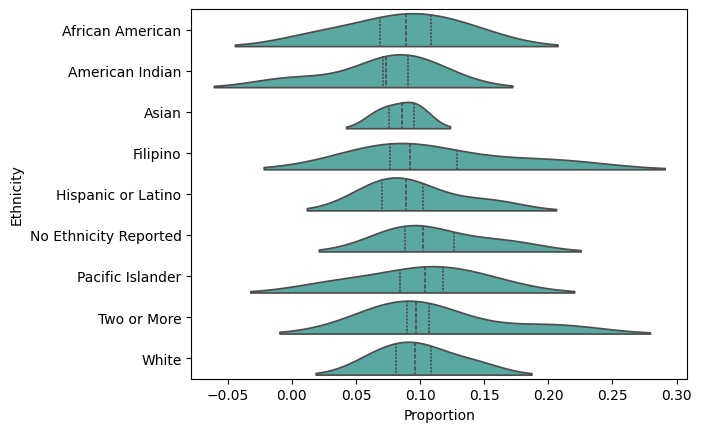

In [201]:
sns.violinplot(data=arts_eth_prop_melt, x="Proportion", y="Ethnicity", split=True, density_norm = 'count',  inner="quart", color = '#4db6ac')

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

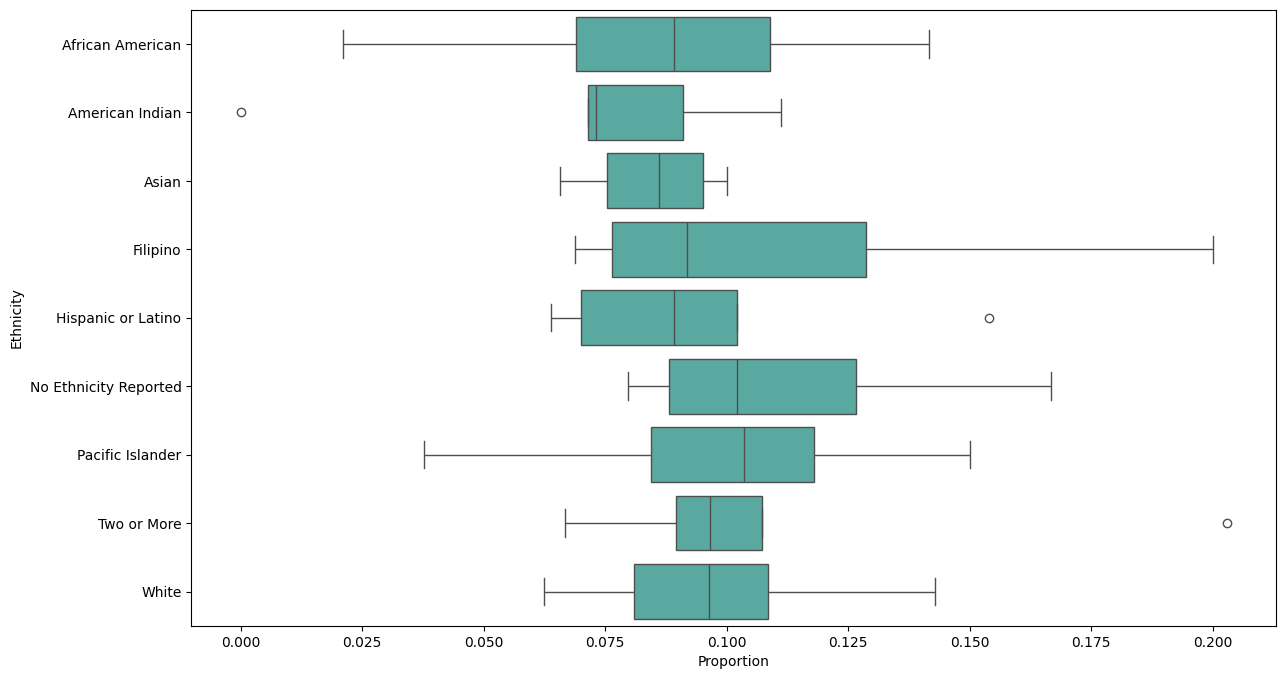

In [197]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=arts_eth_prop_melt, x="Proportion", y="Ethnicity", color = '#4db6ac')

In [119]:
arts_total_enroll_eth.fillna(0, inplace = True)

In [120]:
arts_total_enroll_eth

CDS_CODE DistrictCode                        DistrictName  \
0     01100170112607      0110017  Alameda County Office of Education   
1     01611190130229      0161119                     Alameda Unified   
2     01611190130625      0161119                     Alameda Unified   
3     01611270130450      0161127                 Albany City Unified   
4     01611430131177      0161143                    Berkeley Unified   
...              ...          ...                                 ...   
1297  57727105738802      5772710              Woodland Joint Unified   
1298  58727365830013      5872736            Marysville Joint Unified   
1299  58727365830138      5872736            Marysville Joint Unified   
1300  58727365835202      5872736            Marysville Joint Unified   
1301  58727695838305      5872769                Wheatland Union High   

                                   SchoolName  total_EnrollNoEthRptd_total  \
0      Envision Academy for Arts & Technology                            0   
1                                Alameda High                           53   
2                      Alternatives in Action                          113   
3                                 Albany High                          121   
4                               Berkeley High                            6   
...                                       ...                          ...   
1297                     Woodland Senior High                           69   
1298                           Lindhurst High                           18   
1299  Marysville Charter Academy for the Arts                           16   
1300                          Marysville High                           48   
1301                     Wheatland Union High                           44   

      total_EnrollAmInd_total  total_EnrollAsian_total  \
0                          14                       30   
1                          11                     4100   
2                           8                        0   
3                           9                     2632   
4                          41                     1525   
...                       ...                      ...   
1297                       52                      267   
1298                      124                     1133   
1299                       24                      128   
1300                      280                      373   
1301                       81                      177   

      total_EnrollPacIsl_total  total_EnrollFilipino_total  \
0                           20                           5   
1                           60                         654   
2                            0                           0   
3                           28                         114   
4                           53                         143   
...                        ...                         ...   
1297                        56                          21   
1298                         5                          43   
1299                        24                          16   
1300                        56                          17   
1301                        28                          93   

      total_EnrollHispanic_total  ...  total_EnrollNoEthRptd_arts  \
0                           1078  ...                         0.0   
1                           1341  ...                         6.0   
2                           1286  ...                         9.0   
3                           1403  ...                        11.0   
4                           4301  ...                         1.0   
...                          ...  ...                         ...   
1297                        6408  ...                         6.0   
1298                        3708  ...                         0.0   
1299                        1142  ...                         6.0   
1300                        1745  ...                         3.0 

In [121]:
ethnicity_columns = ['total_EnrollNoEthRptd',
       'total_EnrollAmInd', 'total_EnrollAsian', 'total_EnrollPacIsl',
       'total_EnrollFilipino', 'total_EnrollHispanic', 'total_EnrollAfrAm',
       'total_EnrollWhite', 'total_EnrollTwoOrMore', 'total_EnrollTotal']

arts_enrollment_prop_eth = arts_total_enroll_eth[['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']].copy()

for column in ethnicity_columns:
    arts_column = f"{column}_arts"
    total_column = f"{column}_total"
    proportion_column = f"Proportion_{column}"

    # Calculate proportion and handle division by zero
    arts_enrollment_prop_eth.loc[:, proportion_column] = (
        arts_total_enroll_eth[arts_column] /
        arts_total_enroll_eth[total_column].replace(0, np.nan)
    )

In [122]:
arts_enrollment_prop_eth

CDS_CODE DistrictCode                        DistrictName  \
0     01100170112607      0110017  Alameda County Office of Education   
1     01611190130229      0161119                     Alameda Unified   
2     01611190130625      0161119                     Alameda Unified   
3     01611270130450      0161127                 Albany City Unified   
4     01611430131177      0161143                    Berkeley Unified   
...              ...          ...                                 ...   
1297  57727105738802      5772710              Woodland Joint Unified   
1298  58727365830013      5872736            Marysville Joint Unified   
1299  58727365830138      5872736            Marysville Joint Unified   
1300  58727365835202      5872736            Marysville Joint Unified   
1301  58727695838305      5872769                Wheatland Union High   

                                   SchoolName  \
0      Envision Academy for Arts & Technology   
1                                Alameda High   
2                      Alternatives in Action   
3                                 Albany High   
4                               Berkeley High   
...                                       ...   
1297                     Woodland Senior High   
1298                           Lindhurst High   
1299  Marysville Charter Academy for the Arts   
1300                          Marysville High   
1301                     Wheatland Union High   

      Proportion_total_EnrollNoEthRptd  Proportion_total_EnrollAmInd  \
0                                  NaN                      0.071429   
1                             0.113208                      0.090909   
2                             0.079646                      0.000000   
3                             0.090909                      0.111111   
4                             0.166667                      0.073171   
...                                ...                           ...   
1297                          0.086957                      0.173077   
1298                          0.000000                      0.072581   
1299                          0.375000                      0.291667   
1300                          0.062500                      0.064286   
1301                          0.113636                      0.086420   

      Proportion_total_EnrollAsian  Proportion_total_EnrollPacIsl  \
0                         0.100000                       0.150000   
1                         0.065610                       0.100000   
2                              NaN                            NaN   
3                         0.093465                       0.107143   
4                         0.078689                       0.037736   
...                            ...                            ...   
1297                      0.067416                       0.089286   
1298                      0.071492                       0.000000   
1299                      0.273438                       0.416667   
1300                      0.115282                       0.053571   
1301                      0.096045                       0.035714   

      Proportion_total_EnrollFilipino  Proportion_total_EnrollHispanic  \
0                            0.200000                         0.153989   
1                            0.068807                         0.070097   
2                                 NaN                         0.063764   
3                            0.078947                         0.089095   
4                            0.104895                         0.102069   
...                               ...                              ...   
1297                         0.142857                         0.096754   
1298                         0.069767                         0.062567   
1299                         0.375000                         0.241681   
1300                         0.117647                         0.076791   
1301                         0.075269 

#### proportion per class

In [123]:
# proportion of each class for each ethnicity?
# will show of the people taking arts classes, which is underrepresented

In [124]:
num_enrolled_arts_eth_class = schools_with_arts.groupby(['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName', 'ClassID']).agg(
    total_EnrollNoEthRptd = pd.NamedAgg(column = 'EnrollNoEthRptd', aggfunc='sum'),
    total_EnrollAmInd = pd.NamedAgg(column = 'EnrollAmInd', aggfunc='sum'),
    total_EnrollAsian = pd.NamedAgg(column = 'EnrollAsian', aggfunc='sum'),
    total_EnrollPacIsl = pd.NamedAgg(column = 'EnrollPacIsl', aggfunc='sum'),
    total_EnrollFilipino = pd.NamedAgg(column = 'EnrollFilipino', aggfunc='sum'),
    total_EnrollHispanic = pd.NamedAgg(column = 'EnrollHispanic', aggfunc='sum'),
    total_EnrollAfrAm = pd.NamedAgg(column = 'EnrollAfrAm', aggfunc='sum'),
    total_EnrollWhite = pd.NamedAgg(column = 'EnrollWhite', aggfunc='sum'),
    total_EnrollTwoOrMore = pd.NamedAgg(column = 'EnrollTwoOrMore', aggfunc='sum'),
    total_EnrollTotal = pd.NamedAgg(column = 'EnrollTotal', aggfunc='sum'),
    ).reset_index()
# num_enrolled_arts_eth.shape #1267

In [125]:
num_enrolled_arts_eth_class

CDS_CODE DistrictCode                        DistrictName  \
0      01100170112607      0110017  Alameda County Office of Education   
1      01100170112607      0110017  Alameda County Office of Education   
2      01100170112607      0110017  Alameda County Office of Education   
3      01100170112607      0110017  Alameda County Office of Education   
4      01100170112607      0110017  Alameda County Office of Education   
...               ...          ...                                 ...   
35306  58727695838305      5872769                Wheatland Union High   
35307  58727695838305      5872769                Wheatland Union High   
35308  58727695838305      5872769                Wheatland Union High   
35309  58727695838305      5872769                Wheatland Union High   
35310  58727695838305      5872769                Wheatland Union High   

                                   SchoolName   ClassID  \
0      Envision Academy for Arts & Technology  49891A12   
1      Envision Academy for Arts & Technology  49893A12   
2      Envision Academy for Arts & Technology  49894A12   
3      Envision Academy for Arts & Technology  49895A12   
4      Envision Academy for Arts & Technology  65471A12   
...                                       ...       ...   
35306                    Wheatland Union High  1_Y_39_2   
35307                    Wheatland Union High  1_Y_39_3   
35308                    Wheatland Union High  1_Y_39_4   
35309                    Wheatland Union High  1_Y_39_5   
35310                    Wheatland Union High  1_Y_39_7   

       total_EnrollNoEthRptd  total_EnrollAmInd  total_EnrollAsian  \
0                          0                  0                  1   
1                          0                  0                  0   
2                          0                  1                  0   
3                          0                  0                  1   
4                          0                  0                  0   
...                      ...                ...                ...   
35306                      1                  1                  1   
35307                      0                  0                  1   
35308                      0                  0                  0   
35309                      1                  1                  0   
35310                      2                  1                  1   

       total_EnrollPacIsl  total_EnrollFilipino  total_EnrollHispanic  \
0                       1                     0                    12   
1                       0                     0                    17   
2                       0                     0                    19   
3                       0                     0                    14   
4                       0                     0                    12   
...                   ...                   ...                   ...   
35306                   0                     2                     8   
35307                   0                     1                    11   
35308                   0                     0                    10   
35309                   0                     0                     7   
35310                   0                     0                     8   

       total_EnrollAfrAm  total_EnrollWhite  total_EnrollTwoOrMore  \
0                     10                  0                      2   
1                      7                  1                      0   
2                      3                  0                      3   
3                      6                  0                      2   
4                      6                  2                      2   
...                  ...                ...                    ...   
35306                  0                 15                      2   
35307                  1                 16                      1   
35308                  1                 12                      2 

In [126]:
ethnicity_columns = ['total_EnrollNoEthRptd',
       'total_EnrollAmInd', 'total_EnrollAsian', 'total_EnrollPacIsl',
       'total_EnrollFilipino', 'total_EnrollHispanic', 'total_EnrollAfrAm',
       'total_EnrollWhite', 'total_EnrollTwoOrMore']

prop_eth_arts_class = num_enrolled_arts_eth_class[['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']].copy()

for column in ethnicity_columns:
    proportion_column = f"Proportion_{column}"

    # Calculate proportion and handle division by zero
    prop_eth_arts_class.loc[:, proportion_column] = (
        num_enrolled_arts_eth_class[column] /
        num_enrolled_arts_eth_class['total_EnrollTotal'].replace(0, np.nan)
    )

In [127]:
prop_eth_arts_class

CDS_CODE DistrictCode                        DistrictName  \
0      01100170112607      0110017  Alameda County Office of Education   
1      01100170112607      0110017  Alameda County Office of Education   
2      01100170112607      0110017  Alameda County Office of Education   
3      01100170112607      0110017  Alameda County Office of Education   
4      01100170112607      0110017  Alameda County Office of Education   
...               ...          ...                                 ...   
35306  58727695838305      5872769                Wheatland Union High   
35307  58727695838305      5872769                Wheatland Union High   
35308  58727695838305      5872769                Wheatland Union High   
35309  58727695838305      5872769                Wheatland Union High   
35310  58727695838305      5872769                Wheatland Union High   

                                   SchoolName  \
0      Envision Academy for Arts & Technology   
1      Envision Academy for Arts & Technology   
2      Envision Academy for Arts & Technology   
3      Envision Academy for Arts & Technology   
4      Envision Academy for Arts & Technology   
...                                       ...   
35306                    Wheatland Union High   
35307                    Wheatland Union High   
35308                    Wheatland Union High   
35309                    Wheatland Union High   
35310                    Wheatland Union High   

       Proportion_total_EnrollNoEthRptd  Proportion_total_EnrollAmInd  \
0                              0.000000                      0.000000   
1                              0.000000                      0.000000   
2                              0.000000                      0.038462   
3                              0.000000                      0.000000   
4                              0.000000                      0.000000   
...                                 ...                           ...   
35306                          0.033333                      0.033333   
35307                          0.000000                      0.000000   
35308                          0.000000                      0.000000   
35309                          0.032258                      0.032258   
35310                          0.066667                      0.033333   

       Proportion_total_EnrollAsian  Proportion_total_EnrollPacIsl  \
0                          0.038462                       0.038462   
1                          0.000000                       0.000000   
2                          0.000000                       0.000000   
3                          0.043478                       0.000000   
4                          0.000000                       0.000000   
...                             ...                            ...   
35306                      0.033333                       0.000000   
35307                      0.032258                       0.000000   
35308                      0.000000                       0.000000   
35309                      0.000000                       0.000000   
35310                      0.033333                       0.000000   

       Proportion_total_EnrollFilipino  Proportion_total_EnrollHispanic  \
0                             0.000000                         0.461538   
1                             0.000000                         0.680000   
2                             0.000000                         0.730769   
3                             0.000000                         0.608696   
4                             0.000000                         0.545455   
...                                ...                              ...   
35306                         0.066667                         0.266667   
35307                         0.032258                         0.354839   
35308                         0.000000                         0.400000   
35309                         0.000000                         0.22

In [128]:
mean_eth_enroll = prop_eth_arts_class.groupby(['CDS_CODE', 'DistrictCode','DistrictName', 'SchoolName']).mean().reset_index()

In [129]:
mean_eth_enroll.head(20)

CDS_CODE DistrictCode                        DistrictName  \
0   01100170112607      0110017  Alameda County Office of Education   
1   01611190130229      0161119                     Alameda Unified   
2   01611190130625      0161119                     Alameda Unified   
3   01611270130450      0161127                 Albany City Unified   
4   01611430131177      0161143                    Berkeley Unified   
5   01611500132225      0161150               Castro Valley Unified   
6   01611680132746      0161168                       Emery Unified   
7   01611760130062      0161176                     Fremont Unified   
8   01611760134270      0161176                     Fremont Unified   
9   01611760134452      0161176                     Fremont Unified   
10  01611760135244      0161176                     Fremont Unified   
11  01611760138693      0161176                     Fremont Unified   
12  01611920108670      0161192                     Hayward Unified   
13  01611920127944      0161192                     Hayward Unified   
14  01611920133629      0161192                     Hayward Unified   
15  01611920135319      0161192                     Hayward Unified   
16  01611920138339      0161192                     Hayward Unified   
17  01612000133397      0161200      Livermore Valley Joint Unified   
18  01612000134536      0161200      Livermore Valley Joint Unified   
19  01612340130054      0161234                      Newark Unified   

                                   SchoolName  \
0      Envision Academy for Arts & Technology   
1                                Alameda High   
2                      Alternatives in Action   
3                                 Albany High   
4                               Berkeley High   
5                          Castro Valley High   
6                             Emery Secondary   
7                               American High   
8                              Irvington High   
9                        John F. Kennedy High   
10                      Mission San Jose High   
11                            Washington High   
12        Leadership Public Schools - Hayward   
13  Silver Oak High Public Montessori Charter   
14                               Hayward High   
15                              Mt. Eden High   
16                              Tennyson High   
17                               Granada High   
18                             Livermore High   
19                       Newark Memorial High   

    Proportion_total_EnrollNoEthRptd  Proportion_total_EnrollAmInd  \
0                           0.000000                      0.003205   
1                           0.005984                      0.000952   
2                           0.118144                      0.000000   
3                           0.011857                      0.001425   
4                           0.000606                      0.001291   
5                           0.012981                      0.000665   
6                           0.000000                      0.000000   
7                           0.000000                      0.000000   
8                           0.000000                      0.001163   
9                           0.000794                      0.001157   
10                          0.000000                      0.000000   
11                          0.001426                      0.000000   
12                          0.032168                      0.000000   
13                          0.009524                      0.000000   
14                          0.000000                      0.005830   
15                          0.001543                      0.005298   
16                          0.000000                      0.004154   
17                          0.001449                      0.001812   
18                          0.001241                      0.009276   
19                          0.002751                      0.000986   

    Proportion_to

#### Visualization

In [130]:
eth_arts_enrl = mean_eth_enroll.melt(id_vars = ['CDS_CODE',	'DistrictCode','DistrictName',	'SchoolName'],
                              var_name = "Ethnicity",
                              value_name = "Proportion")

ethnicity_mapping = {
    'Proportion_total_EnrollNoEthRptd': 'No Ethnicity Reported',
    'Proportion_total_EnrollAmInd': 'American Indian',
    'Proportion_total_EnrollAsian': 'Asian',
    'Proportion_total_EnrollPacIsl': 'Pacific Islander',
    'Proportion_total_EnrollFilipino': 'Filipino',
    'Proportion_total_EnrollHispanic': 'Hispanic',
    'Proportion_total_EnrollAfrAm': 'African American',
    'Proportion_total_EnrollWhite': 'White',
    'Proportion_total_EnrollTwoOrMore': 'Two or More'
}
eth_arts_enrl['Ethnicity'] = eth_arts_enrl['Ethnicity'].map(ethnicity_mapping)
eth_arts_enrl = eth_arts_enrl.sort_values(by=['CDS_CODE', 'Ethnicity']).reset_index(drop=True)

eth_arts_enrl.head(20)

CDS_CODE DistrictCode                        DistrictName  \
0   01100170112607      0110017  Alameda County Office of Education   
1   01100170112607      0110017  Alameda County Office of Education   
2   01100170112607      0110017  Alameda County Office of Education   
3   01100170112607      0110017  Alameda County Office of Education   
4   01100170112607      0110017  Alameda County Office of Education   
5   01100170112607      0110017  Alameda County Office of Education   
6   01100170112607      0110017  Alameda County Office of Education   
7   01100170112607      0110017  Alameda County Office of Education   
8   01100170112607      0110017  Alameda County Office of Education   
9   01611190130229      0161119                     Alameda Unified   
10  01611190130229      0161119                     Alameda Unified   
11  01611190130229      0161119                     Alameda Unified   
12  01611190130229      0161119                     Alameda Unified   
13  01611190130229      0161119                     Alameda Unified   
14  01611190130229      0161119                     Alameda Unified   
15  01611190130229      0161119                     Alameda Unified   
16  01611190130229      0161119                     Alameda Unified   
17  01611190130229      0161119                     Alameda Unified   
18  01611190130625      0161119                     Alameda Unified   
19  01611190130625      0161119                     Alameda Unified   

                                SchoolName              Ethnicity  Proportion  
0   Envision Academy for Arts & Technology       African American    0.305506  
1   Envision Academy for Arts & Technology        American Indian    0.003205  
2   Envision Academy for Arts & Technology                  Asian    0.010797  
3   Envision Academy for Arts & Technology               Filipino    0.003968  
4   Envision Academy for Arts & Technology               Hispanic    0.581904  
5   Envision Academy for Arts & Technology  No Ethnicity Reported    0.000000  
6   Envision Academy for Arts & Technology       Pacific Islander    0.012274  
7   Envision Academy for Arts & Technology            Two or More    0.047157  
8   Envision Academy for Arts & Technology                  White    0.035189  
9                             Alameda High       African American    0.040360  
10                            Alameda High        American Indian    0.000952  
11                            Alameda High                  Asian    0.320247  
12                            Alameda High               Filipino    0.053108  
13                            Alameda High               Hispanic    0.121111  
14                            Alameda High  No Ethnicity Reported    0.005984  
15                            Alameda High       Pacific Islander    0.006739  
16                            Alameda High            Two or More    0.073555  
17                            Alameda High                  White    0.377944  
18                  Alternatives in Action       African American    0.025874  
19                  Alternatives in Action        American Indian    0.000000

<ipython-input-131-0bb65bc934f5>:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=eth_arts_enrl, x="Proportion", y="Ethnicity", split=True, inner="quart", scale = 'count', color = '#4db6ac')


<Axes: xlabel='Proportion', ylabel='Ethnicity'>

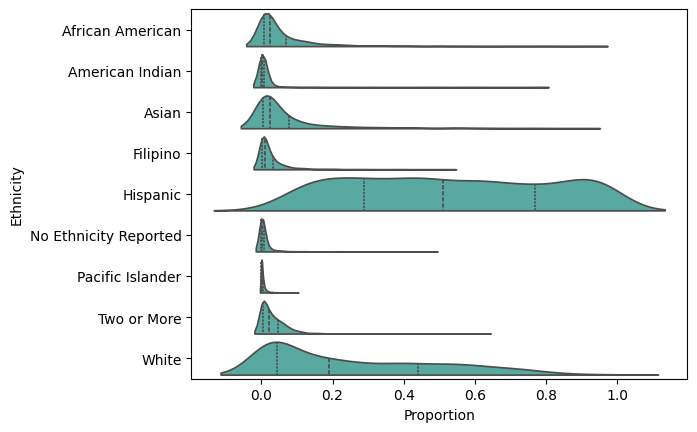

In [131]:
sns.violinplot(data=eth_arts_enrl, x="Proportion", y="Ethnicity", split=True, inner="quart", scale = 'count', color = '#4db6ac')

In [132]:
# compare to total school enrollment proportion distributions
#ANOVA test to see if there is a difference? -- I feel like I'm missing some kind of normalization



In [139]:
public_hs = enrollment_1819[enrollment_1819['CDS_CODE'].isin(public_hs_1819_codes)]
public_hs.head()

ACADEMIC_YEAR        CDS_CODE   COUNTY  \
260406       2018-19  01100170112607  ALAMEDA   
260407       2018-19  01100170112607  ALAMEDA   
260408       2018-19  01100170112607  ALAMEDA   
260409       2018-19  01100170112607  ALAMEDA   
260410       2018-19  01100170112607  ALAMEDA   

                                  DISTRICT  \
260406  Alameda County Office of Education   
260407  Alameda County Office of Education   
260408  Alameda County Office of Education   
260409  Alameda County Office of Education   
260410  Alameda County Office of Education   

                                        SCHOOL ENR_TYPE  RACE_ETHNICITY  \
260406  Envision Academy for Arts & Technology        C               1   
260407  Envision Academy for Arts & Technology        C               1   
260408  Envision Academy for Arts & Technology        C               2   
260409  Envision Academy for Arts & Technology        C               2   
260410  Envision Academy for Arts & Technology        C               3   

       GENDER  GR_KN  GR_1  ...  GR_7  GR_8  UNGR_ELM  GR_9  GR_10  GR_11  \
260406      F      0     0  ...     0     0       0.0     0      1      1   
260407      M      0     0  ...     0     0       0.0     1      0      0   
260408      F      0     0  ...     0     0       0.0     0      1      2   
260409      M      0     0  ...     0     0       0.0     0      1      1   
260410      F      0     0  ...     0     0       0.0     0      1      1   

        GR_12  UNGR_SEC  ENR_TOTAL  ADULT  
260406      0       0.0          2    0.0  
260407      0       0.0          1    0.0  
260408      1       0.0          4    0.0  
260409      0       0.0          2    0.0  
260410      1       0.0          3    0.0  

[5 rows x 25 columns]

In [145]:
public_hs_eth = public_hs.groupby(['CDS_CODE', 'DISTRICT','SCHOOL', 'RACE_ETHNICITY']).agg(
      total = pd.NamedAgg(column = 'ENR_TOTAL', aggfunc='sum'),
).reset_index()
public_hs_eth.head(10)

CDS_CODE                            DISTRICT  \
0  01100170112607  Alameda County Office of Education   
1  01100170112607  Alameda County Office of Education   
2  01100170112607  Alameda County Office of Education   
3  01100170112607  Alameda County Office of Education   
4  01100170112607  Alameda County Office of Education   
5  01100170112607  Alameda County Office of Education   
6  01100170112607  Alameda County Office of Education   
7  01100170112607  Alameda County Office of Education   
8  01611190130229                     Alameda Unified   
9  01611190130229                     Alameda Unified   

                                   SCHOOL  RACE_ETHNICITY  total  
0  Envision Academy for Arts & Technology               1      3  
1  Envision Academy for Arts & Technology               2      6  
2  Envision Academy for Arts & Technology               3      4  
3  Envision Academy for Arts & Technology               4      1  
4  Envision Academy for Arts & Technology               5    217  
5  Envision Academy for Arts & Technology               6    126  
6  Envision Academy for Arts & Technology               7     14  
7  Envision Academy for Arts & Technology               9     14  
8                            Alameda High               0      9  
9                            Alameda High               1      2

In [146]:
ethnicity_mapping = {
    0: 'No Ethnicity Reported',
    1: 'American Indian',
    2: 'Asian',
    3: 'Pacific Islander',
    4: 'Filipino',
    5: 'Hispanic',
    6: 'African American',
    7: 'White',
    9: 'Two or More'
}

public_hs_eth['RACE_ETHNICITY'] = public_hs_eth['RACE_ETHNICITY'].map(ethnicity_mapping)

In [150]:
public_hs_eth.head(10)

CDS_CODE                            DISTRICT  \
0  01100170112607  Alameda County Office of Education   
1  01100170112607  Alameda County Office of Education   
2  01100170112607  Alameda County Office of Education   
3  01100170112607  Alameda County Office of Education   
4  01100170112607  Alameda County Office of Education   
5  01100170112607  Alameda County Office of Education   
6  01100170112607  Alameda County Office of Education   
7  01100170112607  Alameda County Office of Education   
8  01611190130229                     Alameda Unified   
9  01611190130229                     Alameda Unified   

                                   SCHOOL         RACE_ETHNICITY  total  
0  Envision Academy for Arts & Technology        American Indian      3  
1  Envision Academy for Arts & Technology                  Asian      6  
2  Envision Academy for Arts & Technology       Pacific Islander      4  
3  Envision Academy for Arts & Technology               Filipino      1  
4  Envision Academy for Arts & Technology               Hispanic    217  
5  Envision Academy for Arts & Technology       African American    126  
6  Envision Academy for Arts & Technology                  White     14  
7  Envision Academy for Arts & Technology            Two or More     14  
8                            Alameda High  No Ethnicity Reported      9  
9                            Alameda High        American Indian      2

In [149]:
public_hs_eth_pivot = public_hs_eth.pivot(
    index=['CDS_CODE', 'DISTRICT', 'SCHOOL'],
    columns='RACE_ETHNICITY',
    values='total').reset_index()

public_hs_eth_pivot.head()

RACE_ETHNICITY        CDS_CODE                            DISTRICT  \
0               01100170112607  Alameda County Office of Education   
1               01611190130229                     Alameda Unified   
2               01611190130625                     Alameda Unified   
3               01611270130450                 Albany City Unified   
4               01611430131177                    Berkeley Unified   

RACE_ETHNICITY                                  SCHOOL  African American  \
0               Envision Academy for Arts & Technology             126.0   
1                                         Alameda High              89.0   
2                               Alternatives in Action              12.0   
3                                          Albany High              37.0   
4                                        Berkeley High             430.0   

RACE_ETHNICITY  American Indian  Asian  Filipino  Hispanic  \
0                           3.0    6.0       1.0     217.0   
1                           2.0  678.0     108.0     223.0   
2                           1.0    NaN       NaN     168.0   
3                           1.0  356.0      16.0     193.0   
4                           6.0  251.0      24.0     698.0   

RACE_ETHNICITY  No Ethnicity Reported  Pacific Islander  Two or More   White  
0                                 NaN               4.0         14.0    14.0  
1                                 9.0              10.0        109.0   539.0  
2                                17.0               NaN          2.0     2.0  
3                                16.0               4.0        128.0   417.0  
4                                 1.0               9.0        411.0  1324.0

In [151]:
public_hs_eth_pivot.fillna(0, inplace = True)

eth_col = ['No Ethnicity Reported', 'American Indian', 'Asian', 'Pacific Islander', 'Filipino', 'Hispanic', 'African American', 'White', 'Two or More']

public_hs_eth_pivot['Total'] = public_hs_eth_pivot[eth_col].sum(axis=1)
public_hs_eth_pivot.head()

RACE_ETHNICITY        CDS_CODE                            DISTRICT  \
0               01100170112607  Alameda County Office of Education   
1               01611190130229                     Alameda Unified   
2               01611190130625                     Alameda Unified   
3               01611270130450                 Albany City Unified   
4               01611430131177                    Berkeley Unified   

RACE_ETHNICITY                                  SCHOOL  African American  \
0               Envision Academy for Arts & Technology             126.0   
1                                         Alameda High              89.0   
2                               Alternatives in Action              12.0   
3                                          Albany High              37.0   
4                                        Berkeley High             430.0   

RACE_ETHNICITY  American Indian  Asian  Filipino  Hispanic  \
0                           3.0    6.0       1.0     217.0   
1                           2.0  678.0     108.0     223.0   
2                           1.0    0.0       0.0     168.0   
3                           1.0  356.0      16.0     193.0   
4                           6.0  251.0      24.0     698.0   

RACE_ETHNICITY  No Ethnicity Reported  Pacific Islander  Two or More   White  \
0                                 0.0               4.0         14.0    14.0   
1                                 9.0              10.0        109.0   539.0   
2                                17.0               0.0          2.0     2.0   
3                                16.0               4.0        128.0   417.0   
4                                 1.0               9.0        411.0  1324.0   

RACE_ETHNICITY   Total  
0                385.0  
1               1767.0  
2                202.0  
3               1168.0  
4               3154.0

In [161]:
prop_eth_tot = public_hs_eth_pivot[['CDS_CODE', 'DISTRICT','SCHOOL']].copy()

for column in eth_col:
    proportion_column = f"{column}"

    # Calculate proportion and handle division by zero
    prop_eth_tot.loc[:, proportion_column] = (
        public_hs_eth_pivot[column] /
        public_hs_eth_pivot['Total'].replace(0, np.nan)
    )

prop_eth_tot.head()

RACE_ETHNICITY        CDS_CODE                            DISTRICT  \
0               01100170112607  Alameda County Office of Education   
1               01611190130229                     Alameda Unified   
2               01611190130625                     Alameda Unified   
3               01611270130450                 Albany City Unified   
4               01611430131177                    Berkeley Unified   

RACE_ETHNICITY                                  SCHOOL  No Ethnicity Reported  \
0               Envision Academy for Arts & Technology               0.000000   
1                                         Alameda High               0.005093   
2                               Alternatives in Action               0.084158   
3                                          Albany High               0.013699   
4                                        Berkeley High               0.000317   

RACE_ETHNICITY  American Indian     Asian  Pacific Islander  Filipino  \
0                      0.007792  0.015584          0.010390  0.002597   
1                      0.001132  0.383701          0.005659  0.061121   
2                      0.004950  0.000000          0.000000  0.000000   
3                      0.000856  0.304795          0.003425  0.013699   
4                      0.001902  0.079581          0.002854  0.007609   

RACE_ETHNICITY  Hispanic  African American     White  Two or More  
0               0.563636          0.327273  0.036364     0.036364  
1               0.126203          0.050368  0.305037     0.061686  
2               0.831683          0.059406  0.009901     0.009901  
3               0.165240          0.031678  0.357021     0.109589  
4               0.221306          0.136335  0.419784     0.130311

In [316]:
prop_eth_tot_melt = prop_eth_tot.melt(id_vars = ['CDS_CODE',	'DISTRICT','SCHOOL'],
                              var_name = "Ethnicity",
                              value_name = "Proportion")
prop_eth_tot_melt = prop_eth_tot_melt.sort_values(by=['CDS_CODE', 'Ethnicity']).reset_index(drop=True)


prop_eth_tot_melt.head()

CDS_CODE                            DISTRICT  \
0  01100170112607  Alameda County Office of Education   
1  01100170112607  Alameda County Office of Education   
2  01100170112607  Alameda County Office of Education   
3  01100170112607  Alameda County Office of Education   
4  01100170112607  Alameda County Office of Education   

                                   SCHOOL         Ethnicity  Proportion  
0  Envision Academy for Arts & Technology  African American    0.327273  
1  Envision Academy for Arts & Technology   American Indian    0.007792  
2  Envision Academy for Arts & Technology             Asian    0.015584  
3  Envision Academy for Arts & Technology          Filipino    0.002597  
4  Envision Academy for Arts & Technology          Hispanic    0.563636

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

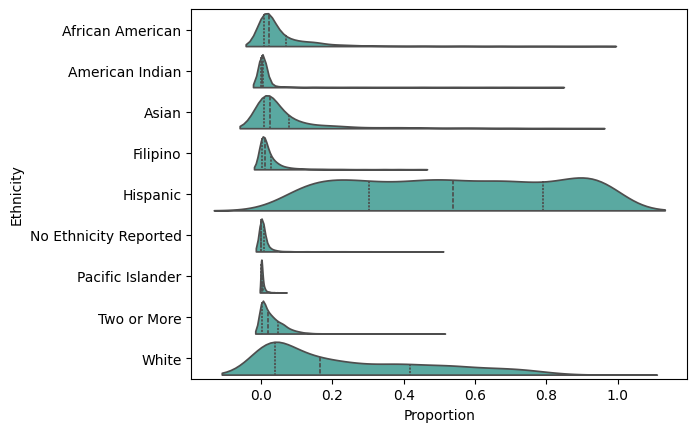

In [167]:
sns.violinplot(data=prop_eth_tot_melt, x="Proportion", y="Ethnicity", split=True, inner="quart", density_norm = 'count', color = '#4db6ac')
#proportion of total enrollments

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

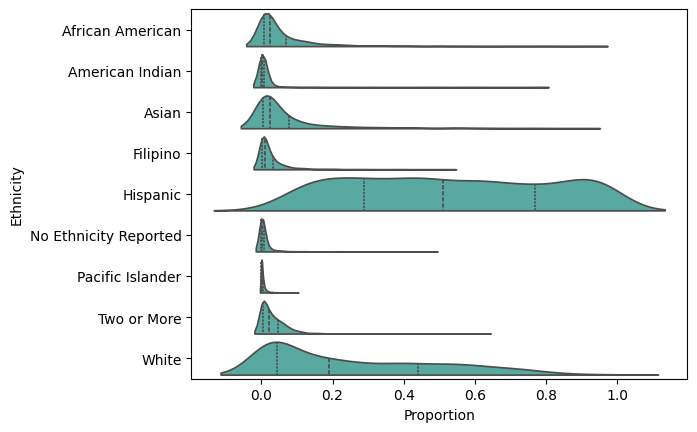

In [165]:
sns.violinplot(data=eth_arts_enrl, x="Proportion", y="Ethnicity", split=True, inner="quart", density_norm = 'count', color = '#4db6ac')
#proportion of arts enrollments

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

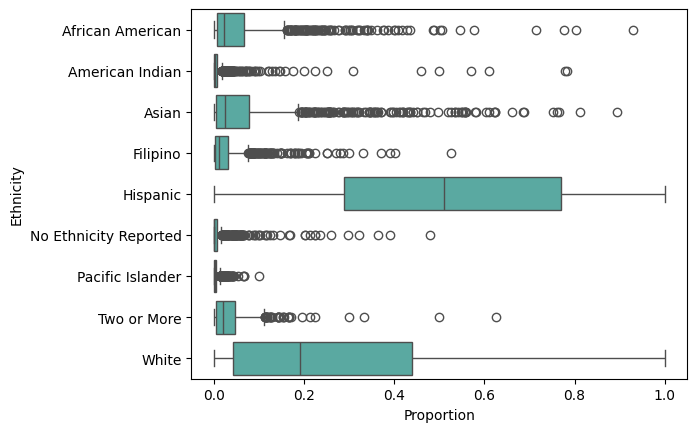

In [198]:
sns.boxplot(data=eth_arts_enrl, x="Proportion", y="Ethnicity", color = '#4db6ac')


<Axes: xlabel='Proportion', ylabel='Ethnicity'>

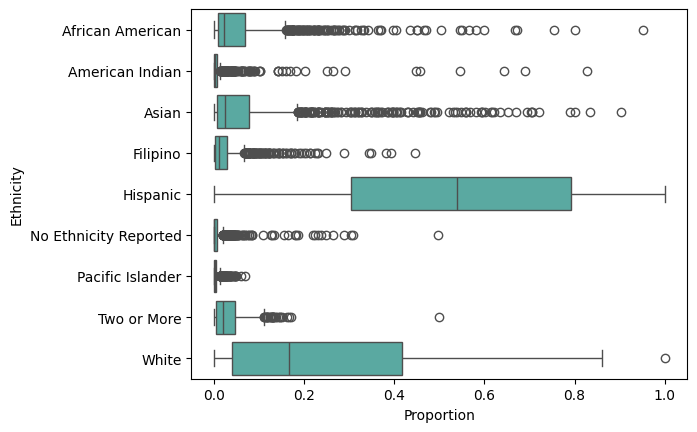

In [200]:
sns.boxplot(data=prop_eth_tot_melt, x="Proportion", y="Ethnicity", color = '#4db6ac')

#### Trying Calculations

In [202]:
schools_tot_enr.head() #total number of course enrollments per schools


CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01611190130229      0161119                     Alameda Unified   
2  01611190130625      0161119                     Alameda Unified   
3  01611270130450      0161127                 Albany City Unified   
4  01611430131177      0161143                    Berkeley Unified   

                               SchoolName  total_EnrollNoEthRptd  \
0  Envision Academy for Arts & Technology                      0   
1                            Alameda High                     53   
2                  Alternatives in Action                    113   
3                             Albany High                    121   
4                           Berkeley High                      6   

   total_EnrollAmInd  total_EnrollAsian  total_EnrollPacIsl  \
0                 14                 30                  20   
1                 11               4100                  60   
2                  8                  0                   0   
3                  9               2632                  28   
4                 41               1525                  53   

   total_EnrollFilipino  total_EnrollHispanic  total_EnrollAfrAm  \
0                     5                  1078                621   
1                   654                  1341                522   
2                     0                  1286                 95   
3                   114                  1403                247   
4                   143                  4301               2590   

   total_EnrollWhite  total_EnrollTwoOrMore  total_EnrollTotal  
0                 70                     69               1907  
1               3239                    659              10639  
2                 16                     15               1533  
3               3070                    943               8567  
4               8176                   2535              19370

In [203]:
public_hs_eth_pivot.head() # total number of school enrollment

RACE_ETHNICITY        CDS_CODE                            DISTRICT  \
0               01100170112607  Alameda County Office of Education   
1               01611190130229                     Alameda Unified   
2               01611190130625                     Alameda Unified   
3               01611270130450                 Albany City Unified   
4               01611430131177                    Berkeley Unified   

RACE_ETHNICITY                                  SCHOOL  African American  \
0               Envision Academy for Arts & Technology             126.0   
1                                         Alameda High              89.0   
2                               Alternatives in Action              12.0   
3                                          Albany High              37.0   
4                                        Berkeley High             430.0   

RACE_ETHNICITY  American Indian  Asian  Filipino  Hispanic  \
0                           3.0    6.0       1.0     217.0   
1                           2.0  678.0     108.0     223.0   
2                           1.0    0.0       0.0     168.0   
3                           1.0  356.0      16.0     193.0   
4                           6.0  251.0      24.0     698.0   

RACE_ETHNICITY  No Ethnicity Reported  Pacific Islander  Two or More   White  \
0                                 0.0               4.0         14.0    14.0   
1                                 9.0              10.0        109.0   539.0   
2                                17.0               0.0          2.0     2.0   
3                                16.0               4.0        128.0   417.0   
4                                 1.0               9.0        411.0  1324.0   

RACE_ETHNICITY   Total  
0                385.0  
1               1767.0  
2                202.0  
3               1168.0  
4               3154.0

In [211]:
avg_num_classes = pd.merge(schools_tot_enr, public_hs_eth_pivot, how = 'inner', left_on = 'CDS_CODE', right_on = 'CDS_CODE')
avg_num_classes['avg_num_classes']= (avg_num_classes['total_EnrollTotal'])/(avg_num_classes['Total'])
avg_num_classes_summary = avg_num_classes[['CDS_CODE', 'total_EnrollTotal', 'Total', 'avg_num_classes']]
avg_num_classes_summary.head()

CDS_CODE  total_EnrollTotal   Total  avg_num_classes
0  01100170112607               1907   385.0         4.953247
1  01611190130229              10639  1767.0         6.020939
2  01611190130625               1533   202.0         7.589109
3  01611270130450               8567  1168.0         7.334760
4  01611430131177              19370  3154.0         6.141408

In [212]:
arts_total_enroll_eth.head() #total arts enrollment

CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01611190130229      0161119                     Alameda Unified   
2  01611190130625      0161119                     Alameda Unified   
3  01611270130450      0161127                 Albany City Unified   
4  01611430131177      0161143                    Berkeley Unified   

                               SchoolName  total_EnrollNoEthRptd  \
0  Envision Academy for Arts & Technology                      0   
1                            Alameda High                     53   
2                  Alternatives in Action                    113   
3                             Albany High                    121   
4                           Berkeley High                      6   

   total_EnrollAmInd  total_EnrollAsian  total_EnrollPacIsl  \
0                 14                 30                  20   
1                 11               4100                  60   
2                  8                  0                   0   
3                  9               2632                  28   
4                 41               1525                  53   

   total_EnrollFilipino  total_EnrollHispanic  ...  arts_EnrollNoEthRptd  \
0                     5                  1078  ...                   0.0   
1                   654                  1341  ...                   6.0   
2                     0                  1286  ...                   9.0   
3                   114                  1403  ...                  11.0   
4                   143                  4301  ...                   1.0   

   arts_EnrollAmInd  arts_EnrollAsian  arts_EnrollPacIsl  arts_EnrollFilipino  \
0               1.0               3.0                3.0                  1.0   
1               1.0             269.0                6.0                 45.0   
2               0.0               0.0                0.0                  0.0   
3               1.0             246.0                3.0                  9.0   
4               3.0             120.0                2.0                 15.0   

   arts_EnrollHispanic  arts_EnrollAfrAm  arts_EnrollWhite  \
0                166.0              88.0              10.0   
1                 94.0              36.0             262.0   
2                 82.0               2.0               1.0   
3                125.0              22.0             296.0   
4                439.0             282.0             887.0   

   arts_EnrollTwoOrMore  arts_EnrollTotal  
0                  14.0             286.0  
1                  59.0             778.0  
2                   1.0              95.0  
3                  91.0             804.0  
4                 272.0            2021.0  

[5 rows x 24 columns]

In [216]:
avg_num_arts_class = pd.merge(public_hs_eth_pivot, arts_total_enroll_eth, how = 'inner', left_on = 'CDS_CODE', right_on = 'CDS_CODE')
avg_num_arts_class['avg_num_classes']= (avg_num_arts_class['arts_EnrollTotal'])/(avg_num_arts_class['Total'])
avg_num_arts_class_summary = avg_num_arts_class[['CDS_CODE', 'arts_EnrollTotal', 'Total', 'avg_num_classes']]
avg_num_arts_class_summary.head()

CDS_CODE  arts_EnrollTotal   Total  avg_num_classes
0  01100170112607             286.0   385.0         0.742857
1  01611190130229             778.0  1767.0         0.440294
2  01611190130625              95.0   202.0         0.470297
3  01611270130450             804.0  1168.0         0.688356
4  01611430131177            2021.0  3154.0         0.640774

In [217]:
avg_num_arts_class_summary[avg_num_arts_class_summary['avg_num_classes'] >1]

CDS_CODE  arts_EnrollTotal   Total  avg_num_classes
48    04614240120394             853.0   444.0         1.921171
114   10621660114553            1169.0   488.0         2.395492
139   10752341037456             579.0   533.0         1.086304
157   12753821230085              19.0    12.0         1.583333
198   15636281533843              89.0    83.0         1.072289
274   19644690134858            2281.0   739.0         3.086604
325   19647330108878            1090.0   779.0         1.399230
343   19647330112870             458.0   371.0         1.234501
348   19647330117069             641.0   640.0         1.001562
353   19647330117747             446.0   441.0         1.011338
358   19647330119727            3027.0  1224.0         2.473039
364   19647330122341             771.0   410.0         1.880488
372   19647330124362            1115.0  1070.0         1.042056
373   19647330124370             911.0   434.0         2.099078
382   19647330124511             695.0   522.0         1.331418
399   19647330126557             682.0   454.0         1.502203
404   19647330127787             507.0   407.0         1.245700
418   19647330135632             275.0   126.0         2.182540
419   19647330135715             401.0   219.0         1.831050
552   20756060117010             250.0   181.0         1.381215
553   20756060125021             440.0   324.0         1.358025
555   20764142030237             132.0   126.0         1.047619
568   23655812333185             180.0   174.0         1.034483
599   27102720125765             202.0   129.0         1.565891
629   30103060134841             236.0   209.0         1.129187
696   30736503030657            2197.0  2195.0         1.000911
711   31669513134657            2075.0  2018.0         1.028246
713   31750853130150            2325.0  2177.0         1.067983
757   33672150132498            2066.0   872.0         2.369266
786   34673143430592            2038.0  1968.0         1.035569
890   36750440116707            1993.0  1017.0         1.959685
903   37680313731478            1276.0  1162.0         1.098107
969   37684113731064            2936.0  2487.0         1.180539
992   38684780107300             321.0   276.0         1.163043
1139  44697994430245              86.0    75.0         1.146667
1163  47704664734901              40.0    34.0         1.176471
1176  48705734830113             603.0   500.0         1.206000
1194  49738820123786             939.0   400.0         2.347500
1199  50710430107136             149.0   142.0         1.049296
1249  54755230116590             523.0   510.0         1.025490
1261  55724135530191             466.0   236.0         1.974576
1262  55724135536750             769.0   376.0         2.045213
1276  56726035630322            1290.0  1046.0         1.233270
1299  58727365830138             787.0   400.0         1.967500

##### Avg num of arts classes per student

In [226]:
num_enrolled_arts_eth.head() #number of arts enrollments


CDS_CODE                        DistrictName  \
0  01100170112607  Alameda County Office of Education   
1  01611190130229                     Alameda Unified   
2  01611190130625                     Alameda Unified   
3  01611270130450                 Albany City Unified   
4  01611430131177                    Berkeley Unified   

                               SchoolName  arts_EnrollNoEthRptd  \
0  Envision Academy for Arts & Technology                     0   
1                            Alameda High                     6   
2                  Alternatives in Action                     9   
3                             Albany High                    11   
4                           Berkeley High                     1   

   arts_EnrollAmInd  arts_EnrollAsian  arts_EnrollPacIsl  arts_EnrollFilipino  \
0                 1                 3                  3                    1   
1                 1               269                  6                   45   
2                 0                 0                  0                    0   
3                 1               246                  3                    9   
4                 3               120                  2                   15   

   arts_EnrollHispanic  arts_EnrollAfrAm  arts_EnrollWhite  \
0                  166                88                10   
1                   94                36               262   
2                   82                 2                 1   
3                  125                22               296   
4                  439               282               887   

   arts_EnrollTwoOrMore  arts_EnrollTotal  
0                    14               286  
1                    59               778  
2                     1                95  
3                    91               804  
4                   272              2021

In [228]:
map = {'arts_EnrollNoEthRptd': 'No Ethnicity Reported',
 'arts_EnrollAmInd': 'American Indian',
 'arts_EnrollAsian': 'Asian',
 'arts_EnrollPacIsl': 'Pacific Islander',
 'arts_EnrollFilipino': 'Filipino',
 'arts_EnrollHispanic': 'Hispanic',
 'arts_EnrollAfrAm': 'African American',
 'arts_EnrollWhite': 'White',
 'arts_EnrollTwoOrMore': 'Two or More',
  'arts_EnrollTotal': 'Total'}

num_enrolled_arts_eth1 = num_enrolled_arts_eth.rename(columns=map)


In [229]:
num_enrolled_arts_eth1.head()

CDS_CODE                        DistrictName  \
0  01100170112607  Alameda County Office of Education   
1  01611190130229                     Alameda Unified   
2  01611190130625                     Alameda Unified   
3  01611270130450                 Albany City Unified   
4  01611430131177                    Berkeley Unified   

                               SchoolName  No Ethnicity Reported  \
0  Envision Academy for Arts & Technology                      0   
1                            Alameda High                      6   
2                  Alternatives in Action                      9   
3                             Albany High                     11   
4                           Berkeley High                      1   

   American Indian  Asian  Pacific Islander  Filipino  Hispanic  \
0                1      3                 3         1       166   
1                1    269                 6        45        94   
2                0      0                 0         0        82   
3                1    246                 3         9       125   
4                3    120                 2        15       439   

   African American  White  Two or More  Total  
0                88     10           14    286  
1                36    262           59    778  
2                 2      1            1     95  
3                22    296           91    804  
4               282    887          272   2021

In [232]:
arts_avg_classes = pd.merge(num_enrolled_arts_eth1,public_hs_eth_pivot, on = 'CDS_CODE',
                            suffixes = ('_arts', '_school'))
arts_avg_classes.head()

CDS_CODE                        DistrictName  \
0  01100170112607  Alameda County Office of Education   
1  01611190130229                     Alameda Unified   
2  01611190130625                     Alameda Unified   
3  01611270130450                 Albany City Unified   
4  01611430131177                    Berkeley Unified   

                               SchoolName  No Ethnicity Reported_arts  \
0  Envision Academy for Arts & Technology                           0   
1                            Alameda High                           6   
2                  Alternatives in Action                           9   
3                             Albany High                          11   
4                           Berkeley High                           1   

   American Indian_arts  Asian_arts  Pacific Islander_arts  Filipino_arts  \
0                     1           3                      3              1   
1                     1         269                      6             45   
2                     0           0                      0              0   
3                     1         246                      3              9   
4                     3         120                      2             15   

   Hispanic_arts  African American_arts  ...  African American_school  \
0            166                     88  ...                    126.0   
1             94                     36  ...                     89.0   
2             82                      2  ...                     12.0   
3            125                     22  ...                     37.0   
4            439                    282  ...                    430.0   

   American Indian_school  Asian_school Filipino_school Hispanic_school  \
0                     3.0           6.0             1.0           217.0   
1                     2.0         678.0           108.0           223.0   
2                     1.0           0.0             0.0           168.0   
3                     1.0         356.0            16.0           193.0   
4                     6.0         251.0            24.0           698.0   

   No Ethnicity Reported_school  Pacific Islander_school  Two or More_school  \
0                           0.0                      4.0                14.0   
1                           9.0                     10.0               109.0   
2                          17.0                      0.0                 2.0   
3                          16.0                      4.0               128.0   
4                           1.0                      9.0               411.0   

   White_school  Total_school  
0          14.0         385.0  
1         539.0        1767.0  
2           2.0         202.0  
3         417.0        1168.0  
4        1324.0        3154.0  

[5 rows x 25 columns]

In [238]:
avg_num_arts_classes_eth = arts_avg_classes[['CDS_CODE','DistrictName','SchoolName']].copy()

ethnicities = ['No Ethnicity Reported', 'American Indian', 'Asian', 'Pacific Islander', 'Filipino', 'Hispanic', 'African American', 'White', 'Two or More', 'Total']
for column in ethnicities:
    arts_column = f"{column}_arts"
    total_column = f"{column}_school"
    proportion_column = f"{column}"

    # Calculate proportion and handle division by zero
    avg_num_arts_classes_eth.loc[:, proportion_column] = (
        arts_avg_classes[arts_column] /
        arts_avg_classes[total_column].replace(0, np.nan)
    )

In [239]:
avg_num_arts_classes_eth.head()

CDS_CODE                        DistrictName  \
0  01100170112607  Alameda County Office of Education   
1  01611190130229                     Alameda Unified   
2  01611190130625                     Alameda Unified   
3  01611270130450                 Albany City Unified   
4  01611430131177                    Berkeley Unified   

                               SchoolName  No Ethnicity Reported  \
0  Envision Academy for Arts & Technology                    NaN   
1                            Alameda High               0.666667   
2                  Alternatives in Action               0.529412   
3                             Albany High               0.687500   
4                           Berkeley High               1.000000   

   American Indian     Asian  Pacific Islander  Filipino  Hispanic  \
0         0.333333  0.500000          0.750000  1.000000  0.764977   
1         0.500000  0.396755          0.600000  0.416667  0.421525   
2         0.000000       NaN               NaN       NaN  0.488095   
3         1.000000  0.691011          0.750000  0.562500  0.647668   
4         0.500000  0.478088          0.222222  0.625000  0.628940   

   African American     White  Two or More     Total  
0          0.698413  0.714286     1.000000  0.742857  
1          0.404494  0.486085     0.541284  0.440294  
2          0.166667  0.500000     0.500000  0.470297  
3          0.594595  0.709832     0.710938  0.688356  
4          0.655814  0.669940     0.661800  0.640774

In [240]:
avg_num_arts_classes_eth_melt = avg_num_arts_classes_eth.melt(id_vars = ['CDS_CODE',	'DistrictName','SchoolName'],
                              var_name = "Ethnicity",
                              value_name = "Proportion")

[Text(0.5, 0, 'Avg Number of Arts Classes per Student')]

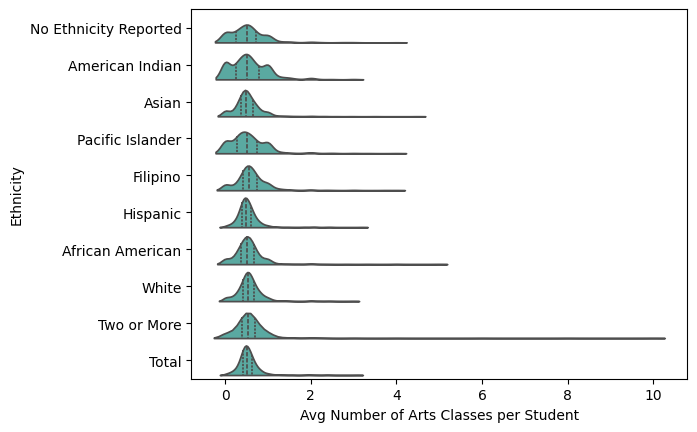

In [244]:
sns.violinplot(data=avg_num_arts_classes_eth_melt, x="Proportion", y="Ethnicity", split=True, density_norm = 'count',
               inner="quart", color = '#4db6ac').set(xlabel = 'Avg Number of Arts Classes per Student')

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

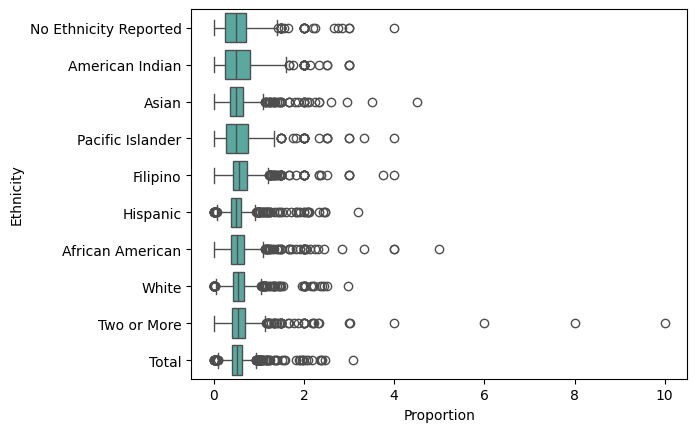

In [245]:
sns.boxplot(data=avg_num_arts_classes_eth_melt, x="Proportion", y="Ethnicity", color = '#4db6ac')

##### Trying to see prop eth vs num courses :')))))


In [250]:
num_arts_classes_offered.head()


CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01611190130229      0161119                     Alameda Unified   
2  01611190130625      0161119                     Alameda Unified   
3  01611270130450      0161127                 Albany City Unified   
4  01611430131177      0161143                    Berkeley Unified   

                               SchoolName  num_classes  
0  Envision Academy for Arts & Technology            2  
1                            Alameda High           18  
2                  Alternatives in Action            3  
3                             Albany High           11  
4                           Berkeley High           29

<Axes: xlabel='num_classes', ylabel='Count'>

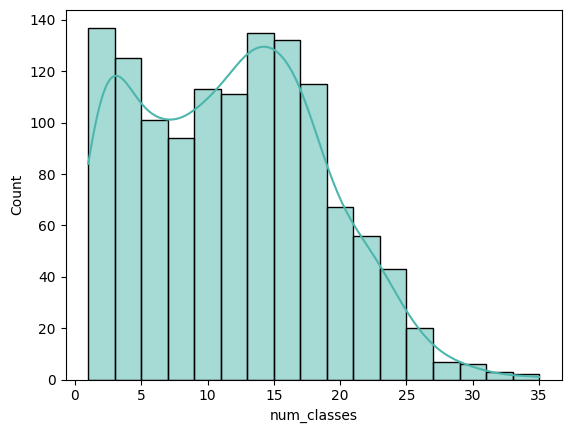

In [251]:
sns.histplot(data=num_arts_classes_offered, x="num_classes", kde=True, color='#4db6ac')

In [254]:
prop_eth_tot.head() #proportions per school



RACE_ETHNICITY        CDS_CODE                            DISTRICT  \
0               01100170112607  Alameda County Office of Education   
1               01611190130229                     Alameda Unified   
2               01611190130625                     Alameda Unified   
3               01611270130450                 Albany City Unified   
4               01611430131177                    Berkeley Unified   

RACE_ETHNICITY                                  SCHOOL  No Ethnicity Reported  \
0               Envision Academy for Arts & Technology               0.000000   
1                                         Alameda High               0.005093   
2                               Alternatives in Action               0.084158   
3                                          Albany High               0.013699   
4                                        Berkeley High               0.000317   

RACE_ETHNICITY  American Indian     Asian  Pacific Islander  Filipino  \
0                      0.007792  0.015584          0.010390  0.002597   
1                      0.001132  0.383701          0.005659  0.061121   
2                      0.004950  0.000000          0.000000  0.000000   
3                      0.000856  0.304795          0.003425  0.013699   
4                      0.001902  0.079581          0.002854  0.007609   

RACE_ETHNICITY  Hispanic  African American     White  Two or More  
0               0.563636          0.327273  0.036364     0.036364  
1               0.126203          0.050368  0.305037     0.061686  
2               0.831683          0.059406  0.009901     0.009901  
3               0.165240          0.031678  0.357021     0.109589  
4               0.221306          0.136335  0.419784     0.130311

In [319]:
prop_eth_tot_num_classes = pd.merge(num_arts_classes_offered, prop_eth_tot, how = 'inner', left_on = 'CDS_CODE', right_on = 'CDS_CODE')

In [320]:
prop_eth_tot_num_classes.drop(columns = ['DISTRICT','SCHOOL'], inplace = True)
prop_eth_tot_num_classes.head()

CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01611190130229      0161119                     Alameda Unified   
2  01611190130625      0161119                     Alameda Unified   
3  01611270130450      0161127                 Albany City Unified   
4  01611430131177      0161143                    Berkeley Unified   

                               SchoolName  num_classes  No Ethnicity Reported  \
0  Envision Academy for Arts & Technology            2               0.000000   
1                            Alameda High           18               0.005093   
2                  Alternatives in Action            3               0.084158   
3                             Albany High           11               0.013699   
4                           Berkeley High           29               0.000317   

   American Indian     Asian  Pacific Islander  Filipino  Hispanic  \
0         0.007792  0.015584          0.010390  0.002597  0.563636   
1         0.001132  0.383701          0.005659  0.061121  0.126203   
2         0.004950  0.000000          0.000000  0.000000  0.831683   
3         0.000856  0.304795          0.003425  0.013699  0.165240   
4         0.001902  0.079581          0.002854  0.007609  0.221306   

   African American     White  Two or More  
0          0.327273  0.036364     0.036364  
1          0.050368  0.305037     0.061686  
2          0.059406  0.009901     0.009901  
3          0.031678  0.357021     0.109589  
4          0.136335  0.419784     0.130311

In [321]:
prop_eth_tot_num_classes = prop_eth_tot_num_classes.melt(id_vars = ['CDS_CODE','DistrictCode', 'DistrictName', 'SchoolName', 'num_classes'],
                              var_name = "Ethnicity",
                              value_name = 'Proportion')

prop_eth_tot_num_classes = prop_eth_tot_num_classes.sort_values(by = ['CDS_CODE', 'Ethnicity']).reset_index(drop=True)


In [263]:
prop_eth_tot_num_classes.head()

CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01100170112607      0110017  Alameda County Office of Education   
2  01100170112607      0110017  Alameda County Office of Education   
3  01100170112607      0110017  Alameda County Office of Education   
4  01100170112607      0110017  Alameda County Office of Education   

                               SchoolName  num_classes         Ethnicity  \
0  Envision Academy for Arts & Technology            2  African American   
1  Envision Academy for Arts & Technology            2   American Indian   
2  Envision Academy for Arts & Technology            2             Asian   
3  Envision Academy for Arts & Technology            2          Filipino   
4  Envision Academy for Arts & Technology            2          Hispanic   

   Proportion  
0    0.327273  
1    0.007792  
2    0.015584  
3    0.002597  
4    0.563636

In [266]:
avg_prop_eth_by_num_classes = prop_eth_tot_num_classes.groupby(['num_classes', 'Ethnicity']).agg({'Proportion' : 'mean'}).reset_index()
avg_prop_eth_by_num_classes.head()

num_classes         Ethnicity  Proportion
0            1  African American    0.074097
1            1   American Indian    0.018215
2            1             Asian    0.029351
3            1          Filipino    0.019746
4            1          Hispanic    0.639834

In [268]:
num_class_eth_pivot = avg_prop_eth_by_num_classes.pivot(index='num_classes', columns='Ethnicity', values='Proportion')

<Axes: xlabel='Ethnicity', ylabel='num_classes'>

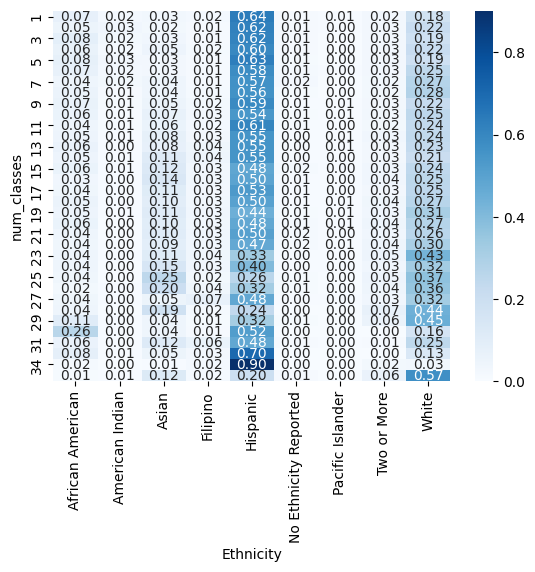

In [269]:
sns.heatmap(num_class_eth_pivot, annot=True, cmap='Blues', fmt='.2f') #i don't think this makes sense either DDDDX --> seems more due to number of students (there's just a lot of hispanic students. in general?)

### Other Visualizations...

In [351]:
threshold_top = district_arts1819['num_classes'].quantile(0.75)
threshold_bottom = district_arts1819['num_classes'].quantile(0.25)
# Filter rows with 'Score' greater than or equal to the threshold
top_25_percent = district_arts1819[district_arts1819['num_classes'] >= threshold_top]
bottom_25_percent = district_arts1819[district_arts1819['num_classes'] <= threshold_bottom]
low = district_arts1819[district_arts1819['num_classes'] <= 3]

top_25_percent_shp = districtarts_join[districtarts_join['num_classes'] >= threshold_top]
bottom_25_percent_shp = districtarts_join[districtarts_join['num_classes'] <= threshold_bottom]


In [362]:
print(threshold_top, threshold_bottom)

15.041666666666666 6.5


In [350]:
districtarts_join

Year    FedID   CDCode                DistrictNa  num_classes  \
0    2018-19  0601770  0161119           Alameda Unified         10.5   
1    2018-19  0601860  0161127       Albany City Unified         11.0   
2    2018-19  0604740  0161143          Berkeley Unified         29.0   
3    2018-19  0607800  0161150     Castro Valley Unified         21.0   
4    2018-19  0612630  0161168             Emery Unified          5.0   
..       ...      ...      ...                       ...          ...   
939  2018-19  0607260  5872728   Camptonville Elementary          NaN   
940  2018-19  0624090  5872736  Marysville Joint Unified         13.0   
941  2018-19  0631180  5872744    Plumas Lake Elementary          NaN   
942  2018-19  0642330  5872751                 Wheatland          NaN   
943  2018-19  0642350  5872769      Wheatland Union High          9.0   

                                              geometry  
0    MULTIPOLYGON (((-13606221.352 4540862.002, -13...  
1    POLYGON ((-13612889.056 4565138.930, -13612899...  
2    POLYGON ((-13609481.010 4565073.896, -13609482...  
3    MULTIPOLYGON (((-13581537.591 4528171.452, -13...  
4    POLYGON ((-13614035.309 4555653.898, -13613927...  
..                                                 ...  
939  POLYGON ((-13475637.801 4796756.168, -13475660...  
940  POLYGON ((-13475637.801 4796756.168, -13475624...  
941  POLYGON ((-13526188.093 4719225.161, -13525994...  
942  POLYGON ((-13500775.523 4754748.024, -13500805...  
943  POLYGON ((-13503989.762 4753344.067, -13504022...  

[944 rows x 6 columns]

In [294]:
top_25 = prop_eth_tot_num_classes[(prop_eth_tot_num_classes['num_classes'] >= threshold_top) & (prop_eth_tot_num_classes['Ethnicity'] != 'Hispanic')]
# top_25 = prop_eth_tot_num_classes[prop_eth_tot_num_classes['num_classes'] >= threshold_top]

In [300]:
low = prop_eth_tot_num_classes[prop_eth_tot_num_classes['num_classes'] <= 3]

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

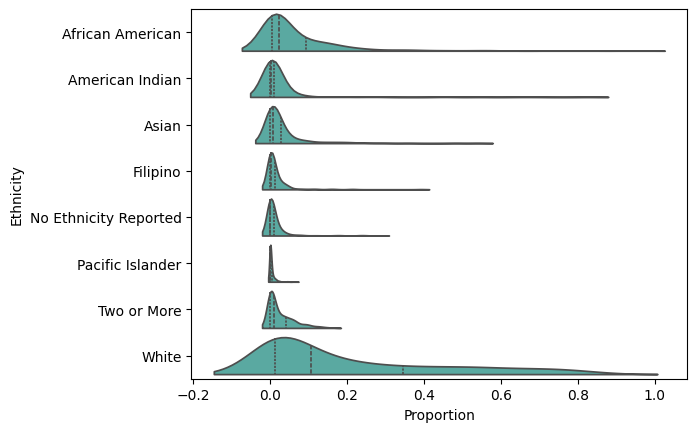

In [291]:
sns.violinplot(data = bottom_25, x = 'Proportion', y = 'Ethnicity', density_norm='count', inner = 'quart',split = True, color = '#4db6ac')

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

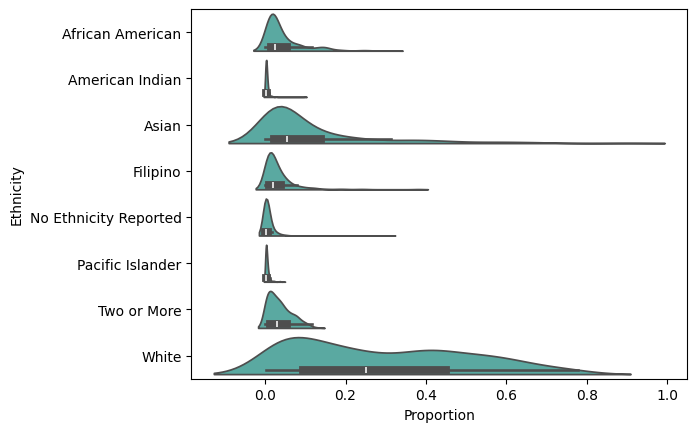

In [290]:
sns.violinplot(data = top_25, x = 'Proportion', y = 'Ethnicity', density_norm='count', split = True, color = '#4db6ac')

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

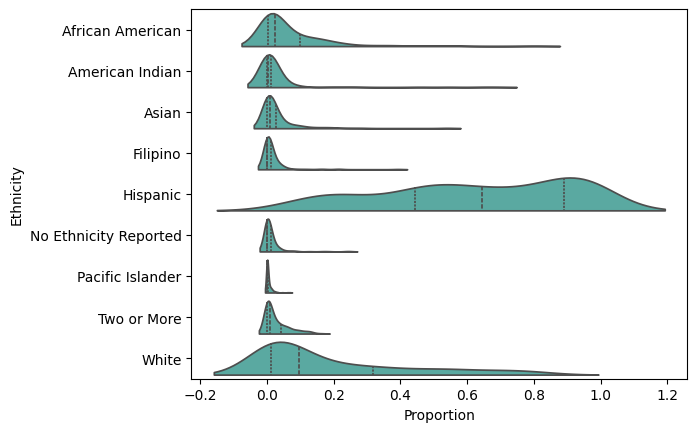

In [301]:
sns.violinplot(data = low, x = 'Proportion', y = 'Ethnicity', density_norm = 'count', inner = 'quart', split = True, color = '#4db6ac')

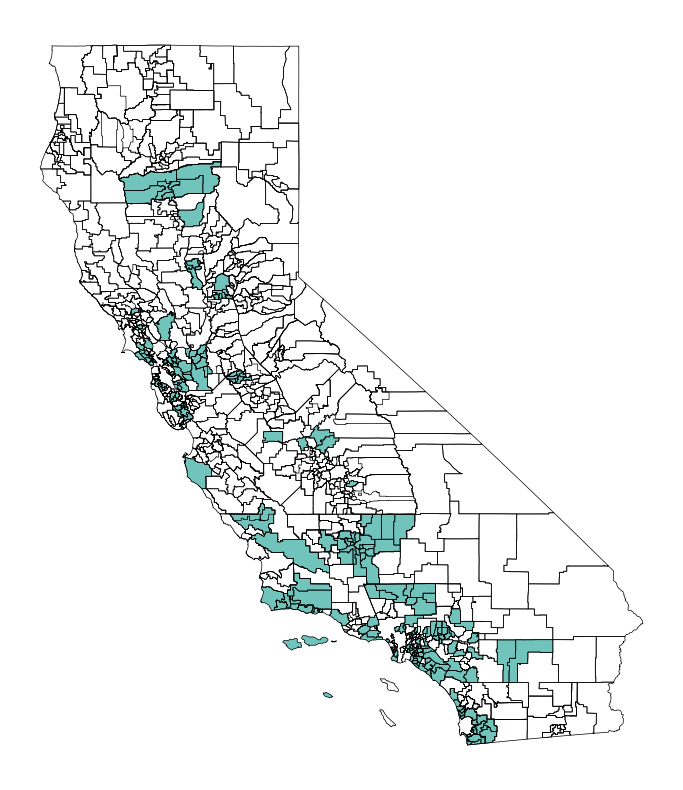

In [360]:
fig, ax = plt.subplots(figsize=(10, 10))

ca_districts_shp.boundary.plot(ax = ax, linewidth = .5, edgecolor = 'black')
top_25_percent_shp.plot(ax=ax, color='#4db6ac', alpha=0.8, label='Top 25%')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

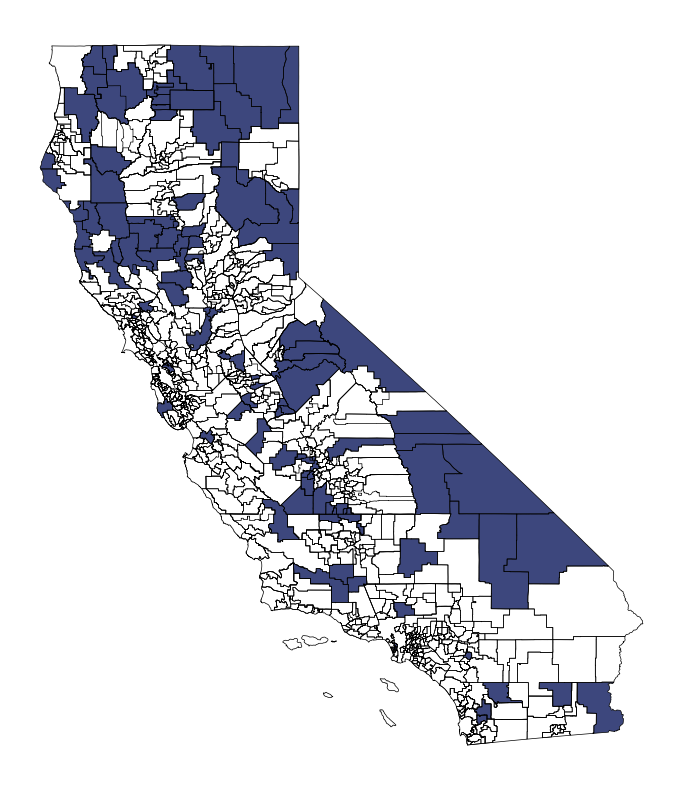

In [361]:
fig, ax = plt.subplots(figsize=(10, 10))

ca_districts_shp.boundary.plot(ax = ax, linewidth = .5, edgecolor = 'black')
bottom_25_percent_shp.plot(ax=ax, color='#0c195c', alpha=0.8, label='Bottom 25%')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

In [365]:
import geopandas as gpd
ca_counties = gpd.read_file('/content/drive/MyDrive/MDS/Data 294P/Data and Code/ca_counties/CA_Counties.shp')

In [369]:
ca_counties


STATEFP COUNTYFP  COUNTYNS  GEOID             NAME                NAMELSAD  \
0       06      091  00277310  06091           Sierra           Sierra County   
1       06      067  00277298  06067       Sacramento       Sacramento County   
2       06      083  00277306  06083    Santa Barbara    Santa Barbara County   
3       06      009  01675885  06009        Calaveras        Calaveras County   
4       06      111  00277320  06111          Ventura          Ventura County   
5       06      037  00277283  06037      Los Angeles      Los Angeles County   
6       06      097  01657246  06097           Sonoma           Sonoma County   
7       06      031  00277280  06031            Kings            Kings County   
8       06      073  00277301  06073        San Diego        San Diego County   
9       06      061  00277295  06061           Placer           Placer County   
10      06      075  00277302  06075    San Francisco    San Francisco County   
11      06      041  00277285  06041            Marin            Marin County   
12      06      043  00277286  06043         Mariposa         Mariposa County   
13      06      035  01693324  06035           Lassen           Lassen County   
14      06      055  00277292  06055             Napa             Napa County   
15      06      089  01682610  06089           Shasta           Shasta County   
16      06      053  00277291  06053         Monterey         Monterey County   
17      06      105  00277317  06105          Trinity          Trinity County   
18      06      045  00277287  06045        Mendocino        Mendocino County   
19      06      027  01804637  06027             Inyo             Inyo County   
20      06      051  00277290  06051             Mono             Mono County   
21      06      109  00277319  06109         Tuolumne         Tuolumne County   
22      06      095  00277312  06095           Solano           Solano County   
23      06      071  00277300  06071   San Bernardino   San Bernardino County   
24      06      013  01675903  06013     Contra Costa     Contra Costa County   
25      06      003  01675840  06003           Alpine           Alpine County   
26      06      017  00277273  06017        El Dorado        El Dorado County   
27      06      113  00277321  06113             Yolo             Yolo County   
28      06      115  00277322  06115             Yuba             Yuba County   
29      06      069  00277299  06069       San Benito       San Benito County   
30      06      023  01681908  06023         Humboldt         Humboldt County   
31      06      065  00277297  06065        Riverside        Riverside County   
32      06      029  02054176  06029             Kern             Kern County   
33      06      011  01675902  06011           Colusa           Colusa County   
34      06      015  01682074  06015        Del Norte        Del Norte County   
35      06      049  00277289  06049            Modoc            Modoc County   
36      06      019  00277274  06019           Fresno           Fresno County   
37      06      039  00277284  06039           Madera           Madera County   
38      06      085  00277307  06085      Santa Clara      Santa Clara County   
39      06      103  01692767  06103           Tehama           Tehama County   
40      06      077  00277303  06077      San Joaquin      San Joaquin County   
41      06      001  01675839  06001          Alameda          Alameda County   
42      06      057  01682927  06057           Nevada           Nevada County   
43      06      007  01675842  06007            Butte            Butte County   
44      06      047  00277288  06047           Merced           Merced County   
45      06      107  00277318  06107           Tulare           Tulare County   
46      06      099  00277314  06099       Stanislaus       Stanislaus County   
47      06      059  00277294  06059           Orange           Orange County   
48      06      025  00277277  060

In [370]:
so_cal = ca_counties[ca_counties['NAME'].isin(['San Diego', 'Imperial', 'Riverside', 'Orange', 'San Bernardino', 'Los Angeles', 'Ventura',
                                               'Santa Barbara', 'San Luis Obispo', 'Kern', 'Inyo'])]

In [372]:
so_cal

STATEFP COUNTYFP  COUNTYNS  GEOID             NAME                NAMELSAD  \
2       06      083  00277306  06083    Santa Barbara    Santa Barbara County   
4       06      111  00277320  06111          Ventura          Ventura County   
5       06      037  00277283  06037      Los Angeles      Los Angeles County   
8       06      073  00277301  06073        San Diego        San Diego County   
19      06      027  01804637  06027             Inyo             Inyo County   
23      06      071  00277300  06071   San Bernardino   San Bernardino County   
31      06      065  00277297  06065        Riverside        Riverside County   
32      06      029  02054176  06029             Kern             Kern County   
47      06      059  00277294  06059           Orange           Orange County   
48      06      025  00277277  06025         Imperial         Imperial County   
57      06      079  00277304  06079  San Luis Obispo  San Luis Obispo County   

   LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT         ALAND  \
2    06      H1  G4020  None  42200     None        A  7.084063e+09   
4    06      H1  G4020   348  37100     None        A  4.771988e+09   
5    06      H1  G4020   348  31080    31084        A  1.051186e+10   
8    06      H1  G4020  None  41740     None        A  1.090437e+10   
19   06      H1  G4020  None   None     None        A  2.641068e+10   
23   06      H1  G4020   348  40140     None        A  5.197558e+10   
31   06      H1  G4020   348  40140     None        A  1.867121e+10   
32   06      H1  G4020  None  12540     None        A  2.106254e+10   
47   06      H1  G4020   348  31080    11244        A  2.053368e+09   
48   06      H1  G4020  None  20940     None        A  1.081459e+10   
57   06      H1  G4020  None  42020     None        A  8.548558e+09   

          AWATER     INTPTLAT      INTPTLON    Shape_Leng    Shape_Area  \
2   2.729752e+09  +34.5370572  -120.0399729  8.916867e+05  1.449841e+10   
4   9.473454e+08  +34.3587415  -119.1331432  5.277722e+05  8.413293e+09   
5   1.793485e+09  +34.1963983  -118.2618616  8.838769e+05  1.803431e+10   
8   8.174046e+08  +33.0236041  -116.7761174  5.530426e+05  1.672201e+10   
19  7.691574e+07  +36.5619770  -117.4039269  1.058635e+06  4.108771e+10   
23  9.641442e+07  +34.8572198  -116.1811967  1.247077e+06  7.749304e+10   
31  2.438832e+08  +33.7298275  -116.0022389  9.112088e+05  2.742705e+10   
32  7.868098e+07  +35.3466288  -118.7295064  8.621711e+05  3.184552e+10   
47  4.019319e+08  +33.6756872  -117.7772068  2.615479e+05  3.554704e+09   
48  7.902174e+08  +33.0408143  -115.3554001  5.930560e+05  1.655928e+10   
57  8.155731e+08  +35.3852242  -120.4475445  7.161982e+05  1.412072e+10   

                                             geometry  
2   MULTIPOLYGON (((-13440081.316 4150394.004, -13...  
4   MULTIPOLYGON (((-13283668.940 4059436.934, -13...  
5   MULTIPOLYGON (((-13214002.519 4051462.857, -13...  
8   POLYGON ((-13073075.796 3919158.524, -13074423...  
19  POLYGON ((-13173280.421 4391099.816, -13173296...  
23  POLYGON ((-13098659.037 4127837.220, -13098658...  
31  POLYGON ((-13099237.334 4011394.774, -13099251...  
32  POLYGON ((-13348728.860 4223737.154, -13349798...  
47  POLYGON ((-13134488.102 3973319.471, -13134662...  
48  POLYGON ((-12771298.952 3857969.622, -12771311...  
57  POLYGON ((-13490260.152 4272335.748, -13490212...

In [376]:
so_cal_districts = gpd.overlay(ca_districts_shp, so_cal, how='intersection')
so_cal_top_25 = gpd.overlay(top_25_percent_shp, so_cal, how='intersection')


In [377]:
so_cal_top_25

Year    FedID   CDCode                    DistrictNa  num_classes  \
0    2018-19  0619540  1563529                     Kern High    16.315789   
1    2018-19  0601620  1964212                   ABC Unified    15.250000   
2    2018-19  0602820  1964246    Antelope Valley Union High    16.300000   
3    2018-19  0602970  1964261               Arcadia Unified    25.000000   
4    2018-19  0604440  1964303            Bellflower Unified    15.500000   
..       ...      ...      ...                           ...          ...   
102  2018-19  0635850  4269328  Santa Ynez Valley Union High    16.000000   
103  2018-19  0601414  4276786         Santa Barbara Unified    17.000000   
104  2018-19  0640980  5672652               Ventura Unified    15.666667   
105  2018-19  0603300  4068700            Atascadero Unified    17.000000   
106  2018-19  0600048  4075457     Paso Robles Joint Unified    19.000000   

    STATEFP COUNTYFP  COUNTYNS  GEOID             NAME  ... CBSAFP METDIVFP  \
0        06      037  00277283  06037      Los Angeles  ...  31080    31084   
1        06      037  00277283  06037      Los Angeles  ...  31080    31084   
2        06      037  00277283  06037      Los Angeles  ...  31080    31084   
3        06      037  00277283  06037      Los Angeles  ...  31080    31084   
4        06      037  00277283  06037      Los Angeles  ...  31080    31084   
..      ...      ...       ...    ...              ...  ...    ...      ...   
102      06      083  00277306  06083    Santa Barbara  ...  42200     None   
103      06      083  00277306  06083    Santa Barbara  ...  42200     None   
104      06      083  00277306  06083    Santa Barbara  ...  42200     None   
105      06      079  00277304  06079  San Luis Obispo  ...  42020     None   
106      06      079  00277304  06079  San Luis Obispo  ...  42020     None   

    FUNCSTAT         ALAND        AWATER     INTPTLAT      INTPTLON  \
0          A  1.051186e+10  1.793485e+09  +34.1963983  -118.2618616   
1          A  1.051186e+10  1.793485e+09  +34.1963983  -118.2618616   
2          A  1.051186e+10  1.793485e+09  +34.1963983  -118.2618616   
3          A  1.051186e+10  1.793485e+09  +34.1963983  -118.2618616   
4          A  1.051186e+10  1.793485e+09  +34.1963983  -118.2618616   
..       ...           ...           ...          ...           ...   
102        A  7.084063e+09  2.729752e+09  +34.5370572  -120.0399729   
103        A  7.084063e+09  2.729752e+09  +34.5370572  -120.0399729   
104        A  7.084063e+09  2.729752e+09  +34.5370572  -120.0399729   
105        A  8.548558e+09  8.155731e+08  +35.3852242  -120.4475445   
106        A  8.548558e+09  8.155731e+08  +35.3852242  -120.4475445   

        Shape_Leng    Shape_Area  \
0    883876.944789  1.803431e+10   
1    883876.944789  1.803431e+10   
2    883876.944789  1.803431e+10   
3    883876.944789  1.803431e+10   
4    883876.944789  1.803431e+10   
..             ...           ...   
102  891686.747247  1.449841e+10   
103  891686.747247  1.449841e+10   
104  891686.747247  1.449841e+10   
105  716198.158031  1.412072e+10   
106  716198.158031  1.412072e+10   

                                              geometry  
0    MULTIPOLYGON (((-13205351.183 4139206.003, -13...  
1    POLYGON ((-13143694.879 4004081.268, -13143694...  
2    POLYGON ((-13103552.181 4139840.066, -13103389...  
3    POLYGON ((-13137605.035 4043485.654, -13137742...  
4    POLYGON ((-13147785.759 4013692.063, -13147785...  
..                                                 ...  
102  POLYGON ((-13298117.945 4091499.062, -13298887...  
103  POLYGON ((-13354106.528 4099322.281, -13353647...  
104  MULTIPOLYGON (((-13296235.532 4089157.921, -13...  
105  POLYGON ((-13369108.499 4179095.738, -13369106...  
106  POLYGON ((-13441900.871 4271919.249, -13441884...  

[107 rows x 25 columns]

In [380]:
top_25_percent_shp

Year    FedID   CDCode                      DistrictNa  num_classes  \
2    2018-19  0604740  0161143                Berkeley Unified    29.000000   
3    2018-19  0607800  0161150           Castro Valley Unified    21.000000   
5    2018-19  0614400  0161176                 Fremont Unified    20.200000   
7    2018-19  0622110  0161200  Livermore Valley Joint Unified    16.500000   
9    2018-19  0627060  0161234                  Newark Unified    22.000000   
..       ...      ...      ...                             ...          ...   
849  2018-19  0632010  5271639      Red Bluff Joint Union High    16.000000   
874  2018-19  0621870  5471993                 Lindsay Unified    17.000000   
927  2018-19  0636840  5672603             Simi Valley Unified    22.333333   
929  2018-19  0640980  5672652                 Ventura Unified    15.666667   
930  2018-19  0609640  5673759           Conejo Valley Unified    21.000000   

                                              geometry  
2    POLYGON ((-13609481.010 4565073.896, -13609482...  
3    MULTIPOLYGON (((-13581537.591 4528171.452, -13...  
5    MULTIPOLYGON (((-13577345.444 4504491.196, -13...  
7    POLYGON ((-13555733.733 4556660.155, -13555759...  
9    POLYGON ((-13583790.666 4505936.872, -13583703...  
..                                                 ...  
849  POLYGON ((-13520713.178 4940740.573, -13520795...  
874  POLYGON ((-13246197.644 4331690.626, -13246187...  
927  POLYGON ((-13208153.206 4071916.807, -13208311...  
929  MULTIPOLYGON (((-13306050.053 3933735.090, -13...  
930  POLYGON ((-13222708.675 4056820.037, -13222373...  

[110 rows x 6 columns]

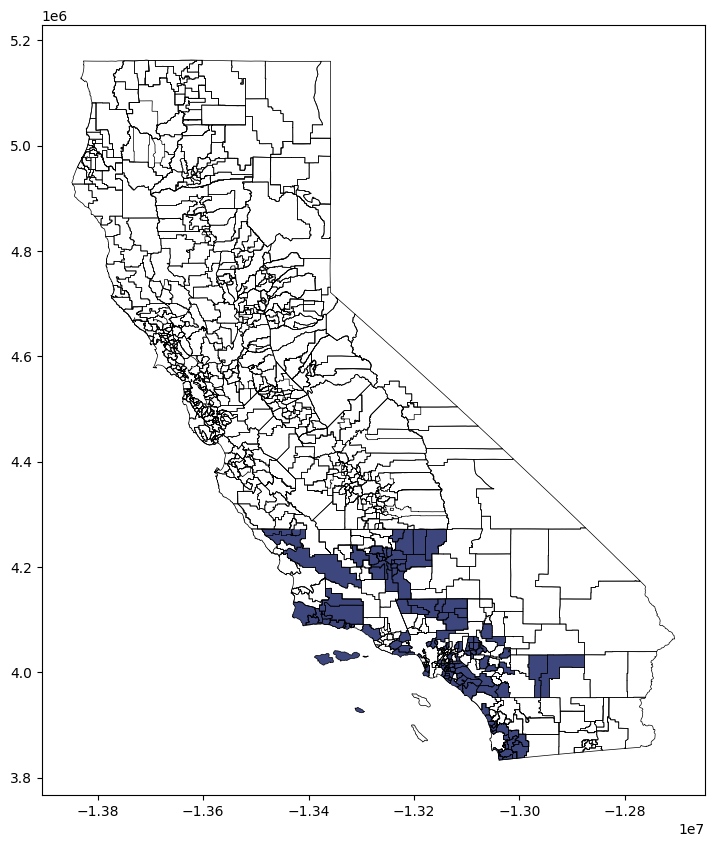

In [384]:
fig, ax = plt.subplots(figsize=(10, 10))
ca_districts_shp.boundary.plot(ax = ax, linewidth = .5, edgecolor = 'black')
so_cal_top_25.plot(ax=ax, color='#0c195c', alpha=0.8, label='Bottom 25%')
plt.show()


In [386]:
print(so_cal_top_25['CDCode'].unique().shape, top_25_percent_shp['CDCode'].unique().shape)

(69,) (110,)


In [387]:
69/110

0.6272727272727273

<Axes: xlabel='num_classes', ylabel='African American'>

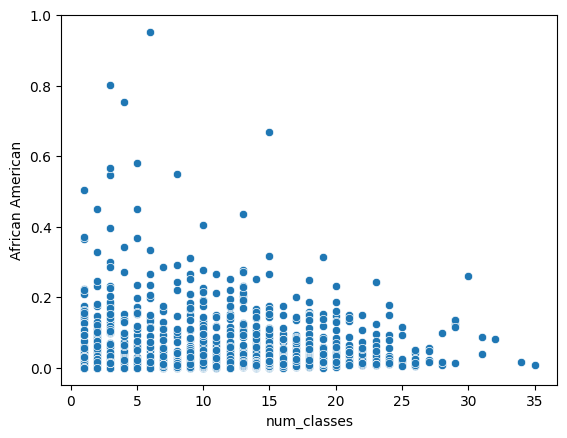

In [312]:
sns.scatterplot(data = prop_eth_tot_num_classes, x = 'num_classes', y = 'African American')

<Axes: xlabel='num_classes', ylabel='Asian'>

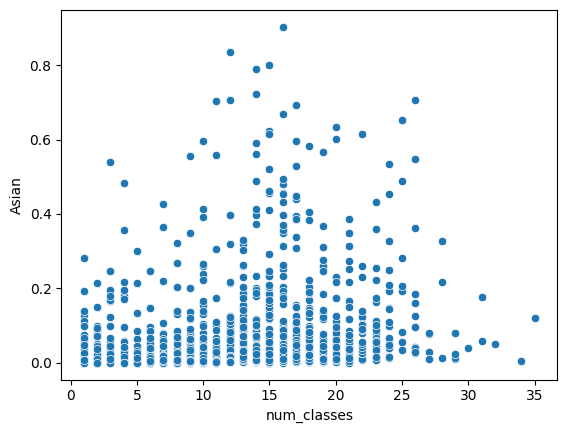

In [313]:
sns.scatterplot(data = prop_eth_tot_num_classes, x = 'num_classes', y = 'Asian')

In [326]:
prop_eth_tot_num_classes.head()
prop_eth_tot_num_classes_dist = prop_eth_tot_num_classes.groupby(['DistrictCode', 'Ethnicity']).agg({'num_classes': 'mean','Proportion' : 'mean'}).reset_index()
prop_eth_tot_num_classes_dist.head()

DistrictCode         Ethnicity  num_classes  Proportion
0      0110017  African American          2.0    0.327273
1      0110017   American Indian          2.0    0.007792
2      0110017             Asian          2.0    0.015584
3      0110017          Filipino          2.0    0.002597
4      0110017          Hispanic          2.0    0.563636

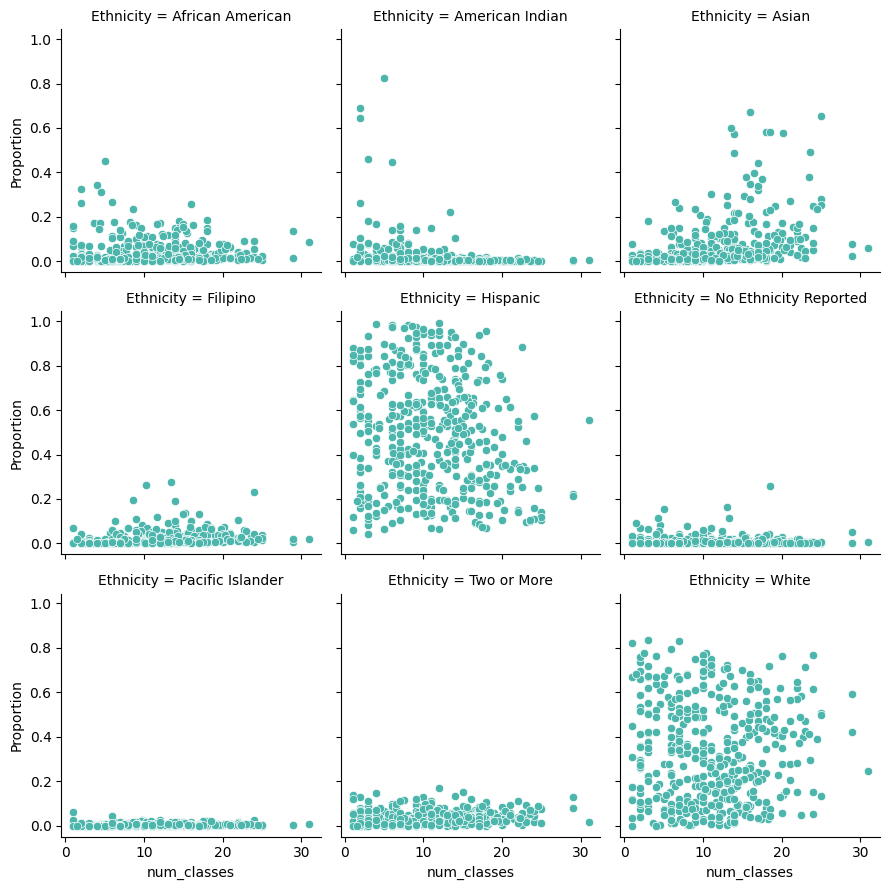

In [327]:
g= sns.FacetGrid(prop_eth_tot_num_classes_dist, col='Ethnicity', col_wrap=3)
g.map(sns.scatterplot, "num_classes", "Proportion", color = '#4db6ac')

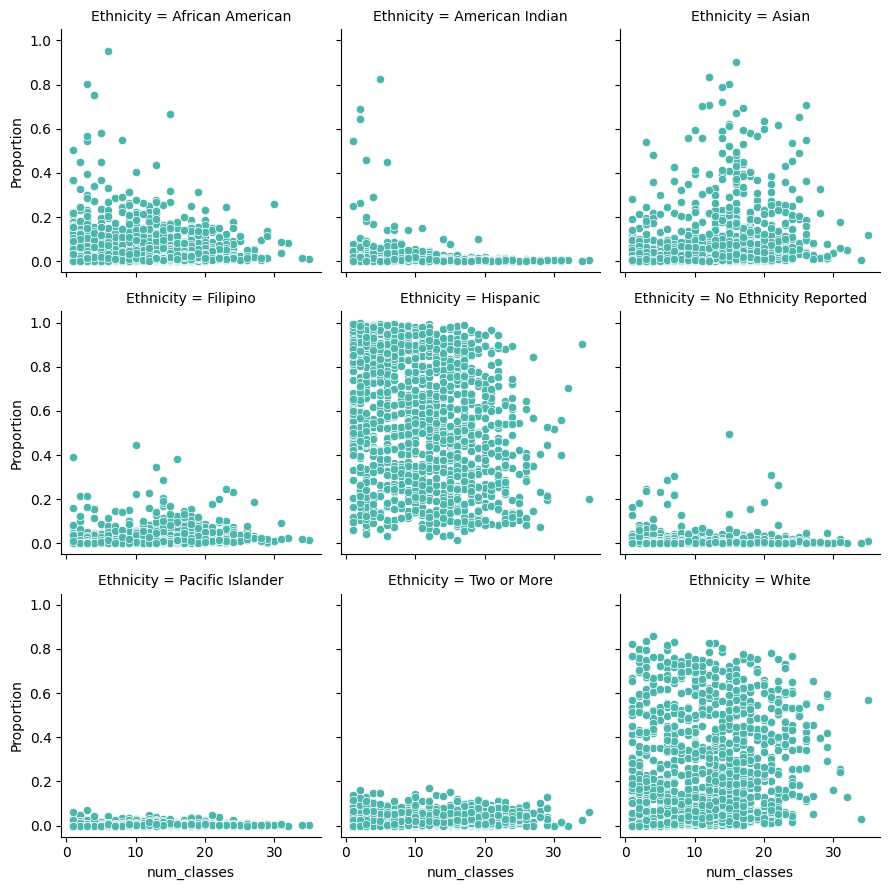

In [328]:
g= sns.FacetGrid(prop_eth_tot_num_classes, col='Ethnicity', col_wrap=3)
g.map(sns.scatterplot, "num_classes", "Proportion", color = '#4db6ac')

In [318]:
prop_eth_tot_num_classes

CDS_CODE DistrictCode                        DistrictName  \
0     01100170112607      0110017  Alameda County Office of Education   
1     01611190130229      0161119                     Alameda Unified   
2     01611190130625      0161119                     Alameda Unified   
3     01611270130450      0161127                 Albany City Unified   
4     01611430131177      0161143                    Berkeley Unified   
...              ...          ...                                 ...   
1262  57727105738802      5772710              Woodland Joint Unified   
1263  58727365830013      5872736            Marysville Joint Unified   
1264  58727365830138      5872736            Marysville Joint Unified   
1265  58727365835202      5872736            Marysville Joint Unified   
1266  58727695838305      5872769                Wheatland Union High   

                                   SchoolName  num_classes  \
0      Envision Academy for Arts & Technology            2   
1                                Alameda High           18   
2                      Alternatives in Action            3   
3                                 Albany High           11   
4                               Berkeley High           29   
...                                       ...          ...   
1262                     Woodland Senior High           13   
1263                           Lindhurst High           10   
1264  Marysville Charter Academy for the Arts           20   
1265                          Marysville High            9   
1266                     Wheatland Union High            9   

      No Ethnicity Reported  American Indian     Asian  Pacific Islander  \
0                  0.000000         0.007792  0.015584          0.010390   
1                  0.005093         0.001132  0.383701          0.005659   
2                  0.084158         0.004950  0.000000          0.000000   
3                  0.013699         0.000856  0.304795          0.003425   
4                  0.000317         0.001902  0.079581          0.002854   
...                     ...              ...       ...               ...   
1262               0.008302         0.006038  0.031698          0.006038   
1263               0.002625         0.018373  0.165354          0.000875   
1264               0.005000         0.007500  0.042500          0.007500   
1265               0.008529         0.051173  0.065032          0.009595   
1266               0.008951         0.015345  0.034527          0.005115   

      Filipino  Hispanic  African American     White  Two or More  
0     0.002597  0.563636          0.327273  0.036364     0.036364  
1     0.061121  0.126203          0.050368  0.305037     0.061686  
2     0.000000  0.831683          0.059406  0.009901     0.009901  
3     0.013699  0.165240          0.031678  0.357021     0.109589  
4     0.007609  0.221306          0.136335  0.419784     0.130311  
...        ...       ...               ...       ...          ...  
1262  0.002264  0.713962          0.012830  0.203019     0.015849  
1263  0.006124  0.543307          0.036745  0.208224     0.018373  
1264  0.005000  0.377500          0.015000  0.437500     0.102500  
1265  0.003198  0.311301          0.044776  0.479744     0.026652  
1266  0.017903  0.281330          0.030691  0.488491     0.117647  

[1267 rows x 14 columns]

In [331]:
low.head()

CDS_CODE DistrictCode                        DistrictName  \
0  01100170112607      0110017  Alameda County Office of Education   
1  01100170112607      0110017  Alameda County Office of Education   
2  01100170112607      0110017  Alameda County Office of Education   
3  01100170112607      0110017  Alameda County Office of Education   
4  01100170112607      0110017  Alameda County Office of Education   

                               SchoolName  num_classes         Ethnicity  \
0  Envision Academy for Arts & Technology            2  African American   
1  Envision Academy for Arts & Technology            2   American Indian   
2  Envision Academy for Arts & Technology            2             Asian   
3  Envision Academy for Arts & Technology            2          Filipino   
4  Envision Academy for Arts & Technology            2          Hispanic   

   Proportion  
0    0.327273  
1    0.007792  
2    0.015584  
3    0.002597  
4    0.563636

In [333]:
none= prop_eth_tot_num_classes[prop_eth_tot_num_classes['num_classes'] <2]

none

CDS_CODE DistrictCode       DistrictName  \
225    01612590115238      0161259    Oakland Unified   
226    01612590115238      0161259    Oakland Unified   
227    01612590115238      0161259    Oakland Unified   
228    01612590115238      0161259    Oakland Unified   
229    01612590115238      0161259    Oakland Unified   
...               ...          ...                ...   
11119  56725460120634      5672546  Oxnard Union High   
11120  56725460120634      5672546  Oxnard Union High   
11121  56725460120634      5672546  Oxnard Union High   
11122  56725460120634      5672546  Oxnard Union High   
11123  56725460120634      5672546  Oxnard Union High   

                                              SchoolName  num_classes  \
225                                           ARISE High            1   
226                                           ARISE High            1   
227                                           ARISE High            1   
228                                           ARISE High            1   
229                                           ARISE High            1   
...                                                  ...          ...   
11119  Architecture, Construction & Engineering Chart...            1   
11120  Architecture, Construction & Engineering Chart...            1   
11121  Architecture, Construction & Engineering Chart...            1   
11122  Architecture, Construction & Engineering Chart...            1   
11123  Architecture, Construction & Engineering Chart...            1   

                   Ethnicity  Proportion  
225         African American    0.018927  
226          American Indian    0.006309  
227                    Asian    0.012618  
228                 Filipino    0.025237  
229                 Hispanic    0.921136  
...                      ...         ...  
11119               Hispanic    0.600000  
11120  No Ethnicity Reported    0.000000  
11121       Pacific Islander    0.000000  
11122            Two or More    0.065385  
11123                  White    0.284615  

[567 rows x 7 columns]

<Axes: xlabel='Proportion', ylabel='Ethnicity'>

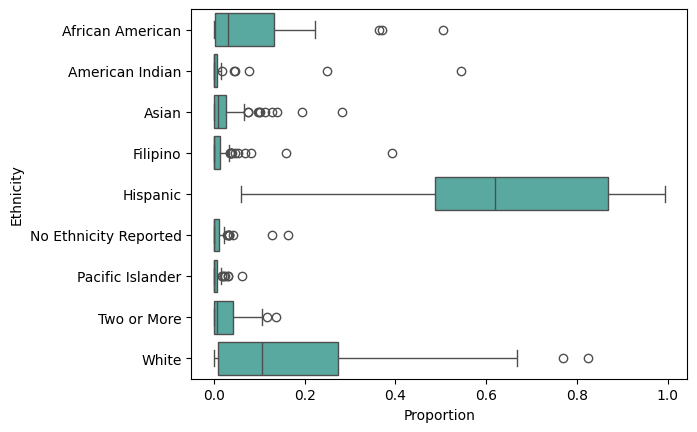

In [336]:
sns.boxplot(data = none, x = 'Proportion', y = 'Ethnicity', color = '#4db6ac')